# Import Library

Pandas adalah library yang digunakan untuk manipulasi dan analisis data. Matplotlib digunakan untuk visualisasi data. NumPy adalah library untuk komputasi numerik. MinMaxScaler dari Scikit-learn digunakan untuk skala fitur.
TensorFlow dan Keras menyediakan modul untuk membangun jaringan saraf, di mana Sequential adalah model dasar untuk jaringan saraf berlapis, Dense adalah lapisan fully connected, dan GRU adalah lapisan unit berulang yang digerakkan oleh gerbang. TensorFlow adalah library utama untuk pembelajaran mesin dan pembelajaran mendalam.
Library math menyediakan fungsi matematis, dan mean_squared_error dari Scikit-learn digunakan untuk mengevaluasi model regresi.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error

# Import Dataset

In [ ]:
bbri_hist = pd.read_csv("/content/drive/MyDrive/Final Project/dataset-3/Dataset_Bank/historical_value/bbri_hist.csv")
bbtn_hist = pd.read_csv("/content/drive/MyDrive/Final Project/dataset-3/Dataset_Bank/historical_value/bbtn_hist.csv")

# Preprocessing

In [ ]:
# Bank BBRI
# Mengonversi kolom 'date' menjadi tipe data datetime
bbri_hist['Date'] = pd.to_datetime(bbri_hist['Date'])
# Mengambil bagian tanggal saja dan mengatur hasilnya sebagai indeks data
bbri_hist.index = bbri_hist['Date'].dt.date

# Bank BTN
# Mengonversi kolom 'date' menjadi tipe data datetime
bbtn_hist['Date'] = pd.to_datetime(bbtn_hist['Date'])
# Mengambil bagian tanggal saja dan mengatur hasilnya sebagai indeks data
bbtn_hist.index = bbtn_hist['Date'].dt.date

In [ ]:
bbri_hist.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2014-04-21,2014-04-21 00:00:00+07:00,1238.436401,1238.436401,1226.113642,1238.436401,102461269,0.0,0.0
2014-04-22,2014-04-22 00:00:00+07:00,1244.597772,1256.920532,1235.355723,1256.920532,156262099,0.0,0.0
2014-04-23,2014-04-23 00:00:00+07:00,1256.920646,1263.081986,1229.194413,1235.355835,112683196,0.0,0.0
2014-04-24,2014-04-24 00:00:00+07:00,1256.920500,1263.081838,1232.274980,1238.436401,192180469,0.0,0.0
2014-04-25,2014-04-25 00:00:00+07:00,1232.274902,1244.597661,1229.194192,1232.274902,166418574,0.0,0.0


In [ ]:
bbtn_hist.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2014-04-21,2014-04-21 00:00:00+07:00,1004.877806,1019.655424,960.544953,975.322571,126804479,0.0,0.0
2014-04-22,2014-04-22 00:00:00+07:00,979.017167,986.405978,964.239547,971.628357,62171548,0.0,0.0
2014-04-23,2014-04-23 00:00:00+07:00,971.628250,1004.877893,953.156227,964.239441,115884437,0.0,0.0
2014-04-24,2014-04-24 00:00:00+07:00,953.156189,953.156189,864.490478,894.045715,170896510,0.0,0.0
2014-04-25,2014-04-25 00:00:00+07:00,897.740150,912.517769,897.740150,908.823364,43804999,0.0,0.0


# EDA

## Bank Bank 1

Text(0, 0.5, 'Price')

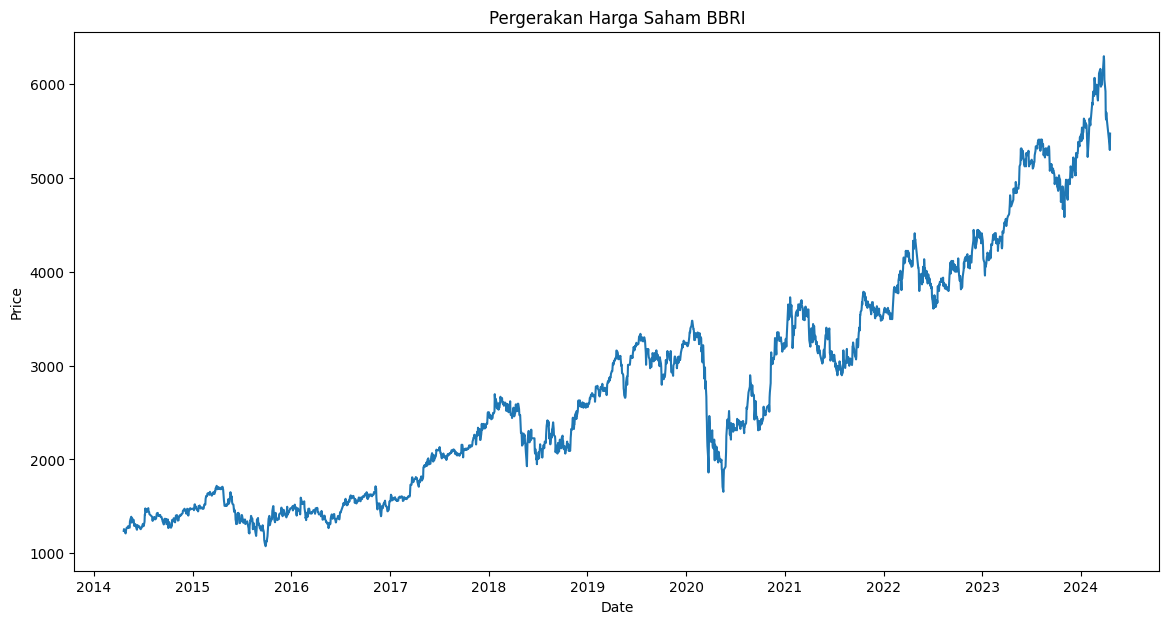

In [ ]:
# Membuat figure baru dengan ukuran 14x7
plt.figure(figsize=(14, 7))
# Memplot data harga penutupan (Close) dari bbri_hist
bbri_hist['Close'].plot()
# Menambahkan judul pada plot
plt.title('Pergerakan Harga Saham BBRI')
# Menambahkan label untuk sumbu y
plt.ylabel('Price')

## Bank Bank 2

Text(0, 0.5, 'Price')

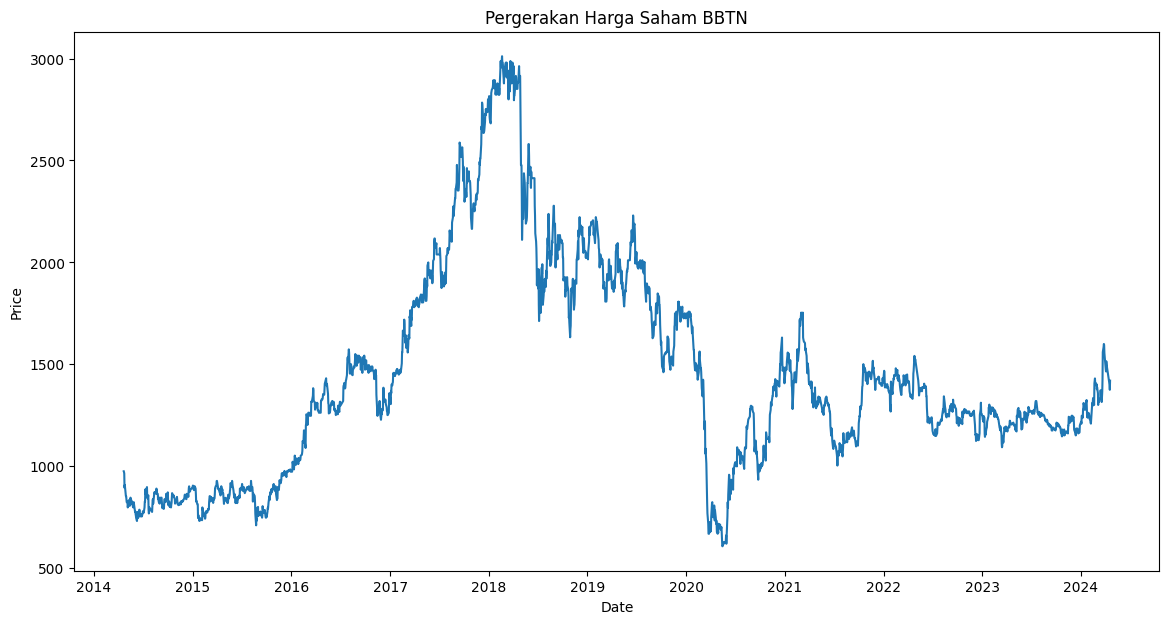

In [ ]:
# Membuat figure baru dengan ukuran 14x7
plt.figure(figsize=(14, 7))
# Memplot data harga penutupan (Close) dari bbtn_hist
bbtn_hist['Close'].plot()
# Menambahkan judul pada plot
plt.title('Pergerakan Harga Saham BBTN')
# Menambahkan label untuk sumbu y
plt.ylabel('Price')

# Modelling

## Bank Bank 1

### Hyperparameter Tuning & Optimatization Model 3 Layers Test

In [ ]:
# Mengambil kolom close
bbri_hist2 = bbri_hist['Close']

In [ ]:
# Train-Test Split
train_size = int(len(bbri_hist2) * 0.80)
test_size = len(bbri_hist2) - train_size
train_data_bbri_gru, test_data_bbri_gru = bbri_hist2[:train_size], bbri_hist2[train_size:]

# Scalling data
# scaler = MinMaxScaler()
# bbri_hist2 = scaler.fit_transform(np.array(bbri_hist2).reshape(-1,1))
# train_data_bbri_gru = scaler.fit_transform(np.array(train_data_bbri_gru).reshape(-1, 1))
# test_data_bbri_gru = scaler.transform(np.array(test_data_bbri_gru).reshape(-1, 1))

In [ ]:
test_data_bbri_gru

Date
2022-03-25    4206.635254
2022-03-28    4224.497559
2022-03-29    4188.772461
2022-03-30    4206.635254
2022-03-31    4161.978516
                 ...     
2024-04-04    5700.000000
2024-04-05    5650.000000
2024-04-16    5350.000000
2024-04-17    5300.000000
2024-04-18    5475.000000
Name: Close, Length: 495, dtype: float64

In [ ]:
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
                   a = dataset[i:(i+time_step),0]
                   dataX.append(a)
                   dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [ ]:
# Memanggil fungsi create_dataset untuk membagi data menjadi dataset input dan output dataset dengan times step 100
time_step = 100
X_train_bbri_gru,Y_train_bbri_gru =  create_dataset(train_data_bbri_gru,time_step)
X_test_bbri_gru,Y_test_bbri_gru =  create_dataset(test_data_bbri_gru,time_step)

In [ ]:
Y_train_bbri_gru

array([0.09276678, 0.09276678, 0.08674113, ..., 0.96030638, 0.97448266,
       0.97731773])

In [ ]:
# Memeriksa value
print(X_train_bbri_gru.shape)
print(X_train_bbri_gru)
print(X_test_bbri_gru.shape)
print(Y_test_bbri_gru.shape)

(1879, 100)
[[0.05206461 0.05793246 0.05108668 ... 0.07368551 0.07669833 0.08071544]
 [0.05793246 0.05108668 0.05206461 ... 0.07669833 0.08071544 0.09276678]
 [0.05108668 0.05206461 0.05010862 ... 0.08071544 0.09276678 0.09276678]
 ...
 [0.84523331 0.82887035 0.81523442 ... 0.97731773 0.97731773 0.957471  ]
 [0.82887035 0.81523442 0.81796177 ... 0.97731773 0.957471   0.96030638]
 [0.81523442 0.81796177 0.81250747 ... 0.957471   0.96030638 0.97448266]]
(394, 100)
(394,)


In [ ]:
pip install keras-tuner

In [ ]:
import tensorflow as tf
from kerastuner import HyperModel, RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Tetapkan seed untuk inisialisasi acak
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

# Definisikan fungsi untuk membuat model GRU dengan hyperparameter
def build_model_l3_test(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_1', min_value=50, max_value=100, step=10),
        return_sequences=True,
        input_shape=(X_train_bbri_gru.shape[1], 1)
    ))
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_2', min_value=50, max_value=100, step=10)
    ))
    model.add(tf.keras.layers.Dense(1))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3])
        ),
        loss='mean_squared_error'
    )
    return model


In [ ]:
from kerastuner.tuners import RandomSearch

# Atur pencarian hyperparameter menggunakan RandomSearch
tuner = RandomSearch(
    build_model_l3_test,
    objective='val_loss',
    max_trials=5,  # Jumlah percobaan untuk menemukan kombinasi hyperparameter terbaik
    executions_per_trial=1,  # Jumlah eksekusi per percobaan untuk akurasi lebih baik
    directory='hyperparameter_tuning_l3_test4',
    project_name='gru_tuning_l3_test4'
)

# Tentukan data pelatihan dan validasi
tuner.search(X_train_bbri_gru, Y_train_bbri_gru, validation_data=(X_test_bbri_gru, Y_test_bbri_gru), epochs=30, batch_size=64, verbose=1)

# Mendapatkan hasil terbaik
best_hps_l3_test = tuner.get_best_hyperparameters(num_trials=1)[0]

# Membangun model dengan hyperparameter terbaik
model_bbri_gru_l3_test = build_model_l3_test(best_hps_l3_test)

Trial 5 Complete [00h 03m 28s]
val_loss: 0.0004822685441467911

Best val_loss So Far: 0.00047461799113079906
Total elapsed time: 00h 16m 06s


In [ ]:
print(best_hps_l3_test)

In [ ]:
# Melihat rangkuman model
model_bbri_gru_l3_test.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 100, 60)           11340     
                                                                 
 gru_3 (GRU)                 (None, 90)                41040     
                                                                 
 dense_1 (Dense)             (None, 1)                 91        
                                                                 
Total params: 52471 (204.96 KB)
Trainable params: 52471 (204.96 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Menetapkan seed untuk TensorFlow untuk memastikan hasil yang konsisten dari operasi stokastik (jika ada)
tf.random.set_seed(seed_value)

# Melatih model menggunakan data pelatihan (X_train_bbri dan Y_train_bbri) dengan data validasi (X_test_bbri dan Y_test_bbri)
# Epochs adalah jumlah kali seluruh dataset akan diberikan kepada model selama proses pelatihan
# Batch_size adalah jumlah sampel data yang akan diproses sebelum pembaharuan bobot model
# verbose = 1 menghasilkan output detail pada setiap epoch selama pelatihan
model_bbri_gru_l3_test.fit(X_train_bbri_gru, Y_train_bbri_gru, validation_data=(X_test_bbri_gru, Y_test_bbri_gru), epochs=50, batch_size=64, verbose=1)
model_bbri_gru_l3_test.save("model_bbri_gru_l3_test.h5")

Epoch 1/50
30/30 [==============================] - 9s 198ms/step - loss: 0.0263 - val_loss: 0.0022
Epoch 2/50
30/30 [==============================] - 6s 203ms/step - loss: 0.0012 - val_loss: 9.9711e-04
Epoch 3/50
30/30 [==============================] - 5s 153ms/step - loss: 5.1182e-04 - val_loss: 0.0014
Epoch 4/50
30/30 [==============================] - 6s 209ms/step - loss: 4.7135e-04 - val_loss: 0.0012
Epoch 5/50
30/30 [==============================] - 5s 170ms/step - loss: 4.4999e-04 - val_loss: 0.0016
Epoch 6/50
30/30 [==============================] - 5s 152ms/step - loss: 4.4187e-04 - val_loss: 0.0011
Epoch 7/50
30/30 [==============================] - 7s 232ms/step - loss: 4.3420e-04 - val_loss: 0.0014
Epoch 8/50
30/30 [==============================] - 5s 154ms/step - loss: 4.0833e-04 - val_loss: 0.0014
Epoch 9/50
30/30 [==============================] - 5s 153ms/step - loss: 4.0236e-04 - val_loss: 9.1644e-04
Epoch 10/50
30/30 [==============================] - 7s 228ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Memprediksi data menggunakan model yang telah dilatih
train_predict_bbri_gru = model_bbri_gru_l3_test.predict(X_train_bbri_gru)
test_predict_bbri_gru = model_bbri_gru_l3_test.predict(X_test_bbri_gru)

13/13 [==============================] - 0s 26ms/step


In [ ]:
Y_train_bbri_gru[:5]

array([0.09276678, 0.09276678, 0.08674113, 0.08473252, 0.09176253])

In [ ]:
train_predict_bbri_gru[:5]

array([[0.08105182],
       [0.09033175],
       [0.09339845],
       [0.0901331 ],
       [0.08762036]], dtype=float32)

In [ ]:
# Transformasi data ke bentuk awal
Y_train_bbri_gru = scaler.inverse_transform(Y_train_bbri_gru.reshape(-1, 1))
Y_test_bbri_gru = scaler.inverse_transform(Y_test_bbri_gru.reshape(-1, 1))
train_predict_bbri_gru = scaler.inverse_transform(train_predict_bbri_gru)
test_predict_bbri_gru = scaler.inverse_transform(test_predict_bbri_gru)

In [ ]:
Y_test_bbri_gru[:5]

array([[3795.79614258],
       [3804.72753906],
       [3876.17749023],
       [3920.83374023],
       [3974.421875  ]])

In [ ]:
test_predict_bbri_gru[:5]

array([[3811.4104],
       [3793.6062],
       [3802.4888],
       [3873.7898],
       [3919.1016]], dtype=float32)

In [ ]:
# Mendefinisikan jumlah langkah waktu sebelumnya yang akan digunakan sebagai input untuk memprediksi langkah waktu saat ini
look_back = 100

# Membuat array kosong dengan ukuran yang sama dengan bbri_hist2
trainPredictPlot_bbri = np.empty_like(bbri_hist2)
# Mengisi array dengan nilai yang sama dengan NaN (untuk plot)
trainPredictPlot_bbri[:,:] = np.nan
# Mengisi bagian dari array dengan hasil prediksi pada data pelatihan
# Menempatkan hasil prediksi pada posisi yang sesuai dalam array untuk plotting
trainPredictPlot_bbri[look_back : len(train_predict_bbri_gru)+look_back,:] = train_predict_bbri_gru

# Membuat array kosong dengan ukuran yang sama dengan bbri_hist2
testPredictPlot_bbri_gru = np.empty_like(bbri_hist2)
# Mengisi array dengan nilai yang sama dengan NaN (untuk plot)
testPredictPlot_bbri_gru[:,:] = np.nan
# Mengisi bagian dari array dengan hasil prediksi pada data uji
# Menempatkan hasil prediksi pada posisi yang sesuai dalam array untuk plotting
testPredictPlot_bbri_gru[len(train_predict_bbri_gru) + (look_back) * 2 + 1 : len(bbri_hist2) - 1, :] = test_predict_bbri_gru

In [ ]:
# Mengambil data harga saham close dan dijadikan dalam bentuk array numpy
bbri_hist3=bbri_hist['Close'].to_numpy()

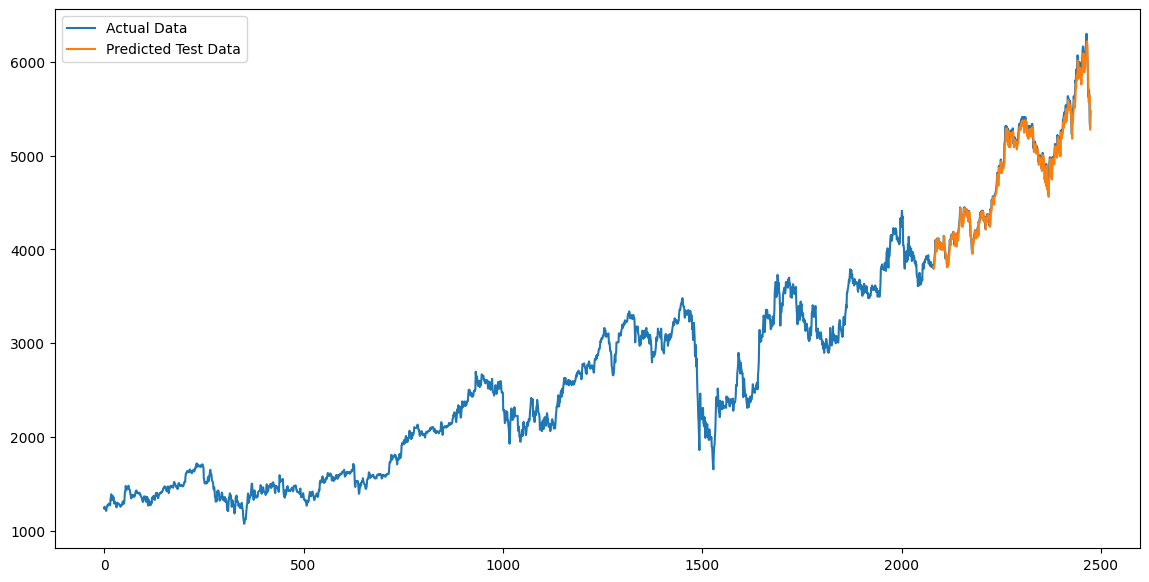

In [ ]:
# Membuat gambar (figure) dengan ukuran 14x7
plt.figure(figsize=(14, 7))
# Membuat plot garis untuk data aktual dengan label 'Actual Data'
plt.plot(bbri_hist3, label='Actual Data')
# Membuat plot garis untuk data prediksi pada dengan label 'Predicted Test Data'
plt.plot(testPredictPlot_bbri_gru, label='Predicted Test Data')
# Menambahkan legenda ke plot berdasarkan label-label yang telah ditentukan sebelumnya
plt.legend()
# Menampilkan plot
plt.show()

In [ ]:
# Fungsi menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Melihat Metric Evaluation RMSE dan MAPE
mape_gru_l3_bbri_test = mean_absolute_percentage_error(Y_test_bbri_gru,test_predict_bbri_gru)
print("RMSE of gru:", np.sqrt(mean_squared_error(Y_test_bbri_gru,test_predict_bbri_gru)))
print("MAPE of gru:", mape_gru_l3_bbri_test)

RMSE of gru: 75.40549319309066
MAPE of gru: 1.1954905663470743


### Hyperparameter Tuning & Optimatization Model 3 Layers

In [ ]:
# Mengambil kolom close
bbri_hist2 = bbri_hist['Close']

In [ ]:
# Train-Test Split
train_size = int(len(bbri_hist2) * 0.80)
test_size = len(bbri_hist2) - train_size
train_data_bbri_gru, test_data_bbri_gru = bbri_hist2[:train_size], bbri_hist2[train_size:]

# Scalling data
scaler = MinMaxScaler()
bbri_hist2 = scaler.fit_transform(np.array(bbri_hist2).reshape(-1,1))
train_data_bbri_gru = scaler.fit_transform(np.array(train_data_bbri_gru).reshape(-1, 1))
test_data_bbri_gru = scaler.transform(np.array(test_data_bbri_gru).reshape(-1, 1))

In [ ]:
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
                   a = dataset[i:(i+time_step),0]
                   dataX.append(a)
                   dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [ ]:
# Memanggil fungsi create_dataset untuk membagi data menjadi dataset input dan output dataset dengan times step 100
time_step = 100
X_train_bbri_gru,Y_train_bbri_gru =  create_dataset(train_data_bbri_gru,time_step)
X_test_bbri_gru,Y_test_bbri_gru =  create_dataset(test_data_bbri_gru,time_step)

In [ ]:
Y_train_bbri_gru

array([0.09276678, 0.09276678, 0.08674113, ..., 0.96030638, 0.97448266,
       0.97731773])

In [ ]:
# Memeriksa value
print(X_train_bbri_gru.shape)
print(X_train_bbri_gru)
print(X_test_bbri_gru.shape)
print(Y_test_bbri_gru.shape)

(1879, 100)
[[0.05206461 0.05793246 0.05108668 ... 0.07368551 0.07669833 0.08071544]
 [0.05793246 0.05108668 0.05206461 ... 0.07669833 0.08071544 0.09276678]
 [0.05108668 0.05206461 0.05010862 ... 0.08071544 0.09276678 0.09276678]
 ...
 [0.84523331 0.82887035 0.81523442 ... 0.97731773 0.97731773 0.957471  ]
 [0.82887035 0.81523442 0.81796177 ... 0.97731773 0.957471   0.96030638]
 [0.81523442 0.81796177 0.81250747 ... 0.957471   0.96030638 0.97448266]]
(394, 100)
(394,)


In [ ]:
pip install keras-tuner

In [ ]:
import tensorflow as tf
from kerastuner import HyperModel, RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Tetapkan seed untuk inisialisasi acak
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

# Definisikan fungsi untuk membuat model GRU dengan hyperparameter
def build_model_l3(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_1', min_value=50, max_value=200, step=50),
        return_sequences=True,
        input_shape=(X_train_bbri_gru.shape[1], 1)
    ))
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_2', min_value=50, max_value=200, step=50)
    ))
    model.add(tf.keras.layers.Dense(1))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='mean_squared_error'
    )
    return model


In [ ]:
from kerastuner.tuners import RandomSearch

# Atur pencarian hyperparameter menggunakan RandomSearch
tuner = RandomSearch(
    build_model_l3,
    objective='val_loss',
    max_trials=10,  # Jumlah percobaan untuk menemukan kombinasi hyperparameter terbaik
    executions_per_trial=1,  # Jumlah eksekusi per percobaan untuk akurasi lebih baik
    directory='hyperparameter_tuning_l3',
    project_name='gru_tuning_l3'
)

# Tentukan data pelatihan dan validasi
tuner.search(X_train_bbri_gru, Y_train_bbri_gru, validation_data=(X_test_bbri_gru, Y_test_bbri_gru), epochs=30, batch_size=64, verbose=1)

# Mendapatkan hasil terbaik
best_hps_l3 = tuner.get_best_hyperparameters(num_trials=1)[0]

# Membangun model dengan hyperparameter terbaik
model_bbri_gru_l3 = build_model_l3(best_hps_l3)

Trial 10 Complete [00h 07m 29s]
val_loss: 0.0008930031326599419

Best val_loss So Far: 0.00047031056601554155
Total elapsed time: 01h 05m 33s


In [ ]:
print(best_hps_l3)

In [ ]:
# Melihat rangkuman model
model_bbri_gru_l3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_2 (GRU)                 (None, 100, 100)          30900     
                                                                 
 gru_3 (GRU)                 (None, 200)               181200    
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 212301 (829.30 KB)
Trainable params: 212301 (829.30 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Menetapkan seed untuk TensorFlow untuk memastikan hasil yang konsisten dari operasi stokastik (jika ada)
tf.random.set_seed(seed_value)

# Melatih model menggunakan data pelatihan (X_train_bbri dan Y_train_bbri) dengan data validasi (X_test_bbri dan Y_test_bbri)
# Epochs adalah jumlah kali seluruh dataset akan diberikan kepada model selama proses pelatihan
# Batch_size adalah jumlah sampel data yang akan diproses sebelum pembaharuan bobot model
# verbose = 1 menghasilkan output detail pada setiap epoch selama pelatihan
model_bbri_gru_l3.fit(X_train_bbri_gru, Y_train_bbri_gru, validation_data=(X_test_bbri_gru, Y_test_bbri_gru), epochs=50, batch_size=64, verbose=1)
model_bbri_gru_l3.save("model_bbri_gru_l3.h5")

Epoch 1/50
30/30 [==============================] - 19s 482ms/step - loss: 0.0219 - val_loss: 0.0069
Epoch 2/50
30/30 [==============================] - 14s 454ms/step - loss: 8.6026e-04 - val_loss: 0.0015
Epoch 3/50
30/30 [==============================] - 14s 461ms/step - loss: 4.6812e-04 - val_loss: 0.0010
Epoch 4/50
30/30 [==============================] - 14s 462ms/step - loss: 4.2950e-04 - val_loss: 7.4948e-04
Epoch 5/50
30/30 [==============================] - 14s 462ms/step - loss: 4.1484e-04 - val_loss: 9.7237e-04
Epoch 6/50
30/30 [==============================] - 14s 454ms/step - loss: 4.0975e-04 - val_loss: 8.1957e-04
Epoch 7/50
30/30 [==============================] - 14s 461ms/step - loss: 3.9457e-04 - val_loss: 0.0011
Epoch 8/50
30/30 [==============================] - 14s 457ms/step - loss: 3.8579e-04 - val_loss: 6.3418e-04
Epoch 9/50
30/30 [==============================] - 13s 437ms/step - loss: 3.6451e-04 - val_loss: 6.2317e-04
Epoch 10/50
30/30 [====================

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Memprediksi data menggunakan model yang telah dilatih
train_predict_bbri_gru = model_bbri_gru_l3.predict(X_train_bbri_gru)
test_predict_bbri_gru = model_bbri_gru_l3.predict(X_test_bbri_gru)

13/13 [==============================] - 2s 144ms/step


In [ ]:
Y_train_bbri_gru[:5]

array([0.09276678, 0.09276678, 0.08674113, 0.08473252, 0.09176253])

In [ ]:
train_predict_bbri_gru[:5]

array([[0.07874513],
       [0.08873589],
       [0.09063105],
       [0.08643715],
       [0.08420566]], dtype=float32)

In [ ]:
# Transformasi data ke bentuk awal
Y_train_bbri_gru = scaler.inverse_transform(Y_train_bbri_gru.reshape(-1, 1))
Y_test_bbri_gru = scaler.inverse_transform(Y_test_bbri_gru.reshape(-1, 1))
train_predict_bbri_gru = scaler.inverse_transform(train_predict_bbri_gru)
test_predict_bbri_gru = scaler.inverse_transform(test_predict_bbri_gru)

In [ ]:
Y_test_bbri_gru[:5]

array([[3795.79614258],
       [3804.72753906],
       [3876.17749023],
       [3920.83374023],
       [3974.421875  ]])

In [ ]:
test_predict_bbri_gru[:5]

array([[3786.2292],
       [3766.479 ],
       [3778.3284],
       [3854.1052],
       [3894.011 ]], dtype=float32)

In [ ]:
# Mendefinisikan jumlah langkah waktu sebelumnya yang akan digunakan sebagai input untuk memprediksi langkah waktu saat ini
look_back = 100

# Membuat array kosong dengan ukuran yang sama dengan bbri_hist2
trainPredictPlot_bbri = np.empty_like(bbri_hist2)
# Mengisi array dengan nilai yang sama dengan NaN (untuk plot)
trainPredictPlot_bbri[:,:] = np.nan
# Mengisi bagian dari array dengan hasil prediksi pada data pelatihan
# Menempatkan hasil prediksi pada posisi yang sesuai dalam array untuk plotting
trainPredictPlot_bbri[look_back : len(train_predict_bbri_gru)+look_back,:] = train_predict_bbri_gru

# Membuat array kosong dengan ukuran yang sama dengan bbri_hist2
testPredictPlot_bbri_gru = np.empty_like(bbri_hist2)
# Mengisi array dengan nilai yang sama dengan NaN (untuk plot)
testPredictPlot_bbri_gru[:,:] = np.nan
# Mengisi bagian dari array dengan hasil prediksi pada data uji
# Menempatkan hasil prediksi pada posisi yang sesuai dalam array untuk plotting
testPredictPlot_bbri_gru[len(train_predict_bbri_gru) + (look_back) * 2 + 1 : len(bbri_hist2) - 1, :] = test_predict_bbri_gru

In [ ]:
# Mengambil data harga saham close dan dijadikan dalam bentuk array numpy
bbri_hist3=bbri_hist['Close'].to_numpy()

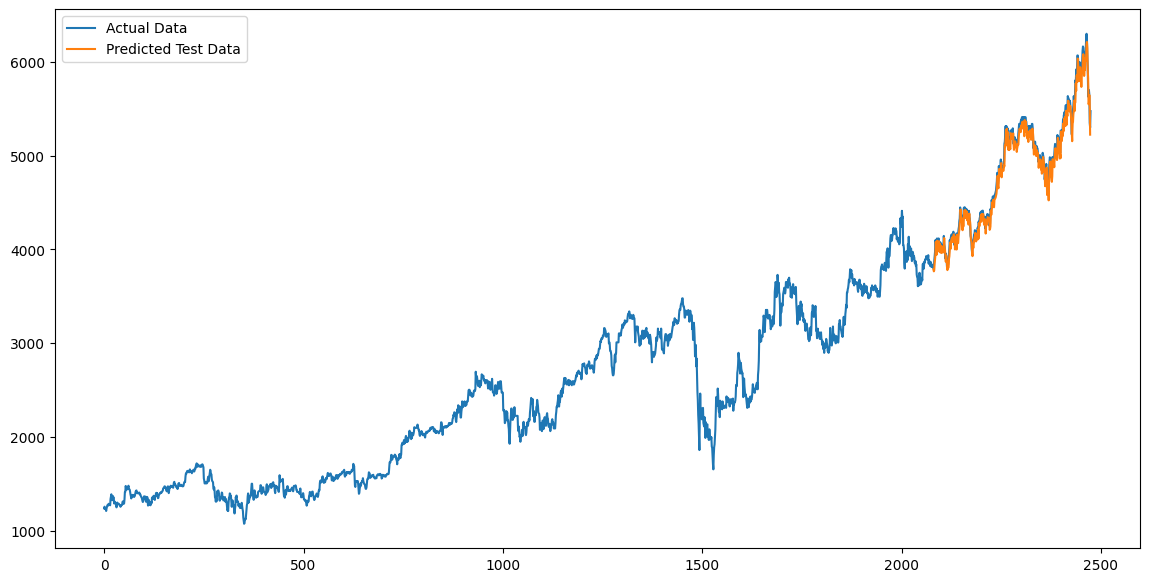

In [ ]:
# Membuat gambar (figure) dengan ukuran 14x7
plt.figure(figsize=(14, 7))
# Membuat plot garis untuk data aktual dengan label 'Actual Data'
plt.plot(bbri_hist3, label='Actual Data')
# Membuat plot garis untuk data prediksi pada dengan label 'Predicted Test Data'
plt.plot(testPredictPlot_bbri_gru, label='Predicted Test Data')
# Menambahkan legenda ke plot berdasarkan label-label yang telah ditentukan sebelumnya
plt.legend()
# Menampilkan plot
plt.show()

In [ ]:
# Fungsi menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Melihat Metric Evaluation RMSE dan MAPE
mape_gru_l3_bbri = mean_absolute_percentage_error(Y_test_bbri_gru,test_predict_bbri_gru)
print("RMSE of gru:", np.sqrt(mean_squared_error(Y_test_bbri_gru,test_predict_bbri_gru)))
print("MAPE of gru:", mape_gru_l3_bbri)

RMSE of gru: 87.79228265710745
MAPE of gru: 1.4182421977063109


### Hyperparameter Tuning & Optimatization Model 4 Layers

In [ ]:
# Mengambil kolom close
bbri_hist2 = bbri_hist['Close']

In [ ]:
# Train-Test Split
train_size = int(len(bbri_hist2) * 0.80)
test_size = len(bbri_hist2) - train_size
train_data_bbri_gru, test_data_bbri_gru = bbri_hist2[:train_size], bbri_hist2[train_size:]

# Scalling data
scaler = MinMaxScaler()
bbri_hist2 = scaler.fit_transform(np.array(bbri_hist2).reshape(-1,1))
train_data_bbri_gru = scaler.fit_transform(np.array(train_data_bbri_gru).reshape(-1, 1))
test_data_bbri_gru = scaler.transform(np.array(test_data_bbri_gru).reshape(-1, 1))

In [ ]:
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
                   a = dataset[i:(i+time_step),0]
                   dataX.append(a)
                   dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [ ]:
# Memanggil fungsi create_dataset untuk membagi data menjadi dataset input dan output dataset dengan times step 100
time_step = 100
X_train_bbri_gru,Y_train_bbri_gru =  create_dataset(train_data_bbri_gru,time_step)
X_test_bbri_gru,Y_test_bbri_gru =  create_dataset(test_data_bbri_gru,time_step)

In [ ]:
Y_train_bbri_gru

array([0.09276678, 0.09276678, 0.08674113, ..., 0.96030638, 0.97448266,
       0.97731773])

In [ ]:
# Memeriksa value
print(X_train_bbri_gru.shape)
print(X_train_bbri_gru)
print(X_test_bbri_gru.shape)
print(Y_test_bbri_gru.shape)

(1879, 100)
[[0.05206461 0.05793246 0.05108668 ... 0.07368551 0.07669833 0.08071544]
 [0.05793246 0.05108668 0.05206461 ... 0.07669833 0.08071544 0.09276678]
 [0.05108668 0.05206461 0.05010862 ... 0.08071544 0.09276678 0.09276678]
 ...
 [0.84523331 0.82887035 0.81523442 ... 0.97731773 0.97731773 0.957471  ]
 [0.82887035 0.81523442 0.81796177 ... 0.97731773 0.957471   0.96030638]
 [0.81523442 0.81796177 0.81250747 ... 0.957471   0.96030638 0.97448266]]
(394, 100)
(394,)


In [ ]:
pip install keras-tuner

In [ ]:
import tensorflow as tf
from kerastuner import HyperModel, RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Tetapkan seed untuk inisialisasi acak
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

# Definisikan fungsi untuk membuat model GRU dengan hyperparameter
def build_model_l4(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_1', min_value=50, max_value=200, step=50),
        return_sequences=True,
        input_shape=(X_train_bbri_gru.shape[1], 1)
    ))
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_2', min_value=50, max_value=200, step=50),
        return_sequences=True
    ))
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_3', min_value=50, max_value=200, step=50)
    ))
    model.add(tf.keras.layers.Dense(1))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='mean_squared_error'
    )
    return model


In [ ]:
from kerastuner.tuners import RandomSearch

# Atur pencarian hyperparameter menggunakan RandomSearch
tuner = RandomSearch(
    build_model_l4,
    objective='val_loss',
    max_trials=10,  # Jumlah percobaan untuk menemukan kombinasi hyperparameter terbaik
    executions_per_trial=1,  # Jumlah eksekusi per percobaan untuk akurasi lebih baik
    directory='hyperparameter_tuning_l4',
    project_name='gru_tuning_l4'
)

# Tentukan data pelatihan dan validasi
tuner.search(X_train_bbri_gru, Y_train_bbri_gru, validation_data=(X_test_bbri_gru, Y_test_bbri_gru), epochs=30, batch_size=64, verbose=1)

# Mendapatkan hasil terbaik
best_hps_l4 = tuner.get_best_hyperparameters(num_trials=1)[0]

# Membangun model dengan hyperparameter terbaik
model_bbri_gru_l4 = build_model_l4(best_hps_l4)

Trial 10 Complete [00h 13m 30s]
val_loss: 0.0009270253940485418

Best val_loss So Far: 0.00047922396333888173
Total elapsed time: 01h 31m 17s


In [ ]:
print(best_hps_l4)

In [ ]:
# Melihat rangkuman model
model_bbri_gru_l4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 100, 100)          30900     
                                                                 
 gru_4 (GRU)                 (None, 100, 200)          181200    
                                                                 
 gru_5 (GRU)                 (None, 200)               241200    
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 453501 (1.73 MB)
Trainable params: 453501 (1.73 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Menetapkan seed untuk TensorFlow untuk memastikan hasil yang konsisten dari operasi stokastik (jika ada)
tf.random.set_seed(seed_value)

# Melatih model menggunakan data pelatihan (X_train_bbri dan Y_train_bbri) dengan data validasi (X_test_bbri dan Y_test_bbri)
# Epochs adalah jumlah kali seluruh dataset akan diberikan kepada model selama proses pelatihan
# Batch_size adalah jumlah sampel data yang akan diproses sebelum pembaharuan bobot model
# verbose = 1 menghasilkan output detail pada setiap epoch selama pelatihan
model_bbri_gru_l4.fit(X_train_bbri_gru, Y_train_bbri_gru, validation_data=(X_test_bbri_gru, Y_test_bbri_gru), epochs=50, batch_size=64, verbose=1)
model_bbri_gru_l4.save("model_bbri_gru_l4.h5")

Epoch 1/50
30/30 [==============================] - 62s 2s/step - loss: 0.0156 - val_loss: 0.0012
Epoch 2/50
30/30 [==============================] - 32s 1s/step - loss: 7.6824e-04 - val_loss: 0.0013
Epoch 3/50
30/30 [==============================] - 24s 810ms/step - loss: 5.8001e-04 - val_loss: 0.0010
Epoch 4/50
30/30 [==============================] - 27s 896ms/step - loss: 5.5299e-04 - val_loss: 8.7963e-04
Epoch 5/50
30/30 [==============================] - 28s 938ms/step - loss: 5.1101e-04 - val_loss: 0.0018
Epoch 6/50
30/30 [==============================] - 26s 847ms/step - loss: 5.1159e-04 - val_loss: 9.5087e-04
Epoch 7/50
30/30 [==============================] - 25s 833ms/step - loss: 5.6386e-04 - val_loss: 8.5757e-04
Epoch 8/50
30/30 [==============================] - 27s 891ms/step - loss: 4.3891e-04 - val_loss: 0.0011
Epoch 9/50
30/30 [==============================] - 25s 853ms/step - loss: 4.2312e-04 - val_loss: 0.0012
Epoch 10/50
30/30 [==============================] - 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Memprediksi data menggunakan model yang telah dilatih
train_predict_bbri_gru = model_bbri_gru_l4.predict(X_train_bbri_gru)
test_predict_bbri_gru = model_bbri_gru_l4.predict(X_test_bbri_gru)

13/13 [==============================] - 2s 140ms/step


In [ ]:
Y_train_bbri_gru[:5]

array([0.09276678, 0.09276678, 0.08674113, 0.08473252, 0.09176253])

In [ ]:
train_predict_bbri_gru[:5]

array([[0.08680081],
       [0.09639587],
       [0.09814461],
       [0.09440479],
       [0.09252395]], dtype=float32)

In [ ]:
# Transformasi data ke bentuk awal
Y_train_bbri_gru = scaler.inverse_transform(Y_train_bbri_gru.reshape(-1, 1))
Y_test_bbri_gru = scaler.inverse_transform(Y_test_bbri_gru.reshape(-1, 1))
train_predict_bbri_gru = scaler.inverse_transform(train_predict_bbri_gru)
test_predict_bbri_gru = scaler.inverse_transform(test_predict_bbri_gru)

In [ ]:
Y_test_bbri_gru[:5]

array([[3795.79614258],
       [3804.72753906],
       [3876.17749023],
       [3920.83374023],
       [3974.421875  ]])

In [ ]:
test_predict_bbri_gru[:5]

array([[3863.439 ],
       [3839.923 ],
       [3856.9004],
       [3938.888 ],
       [3971.6929]], dtype=float32)

In [ ]:
# Mendefinisikan jumlah langkah waktu sebelumnya yang akan digunakan sebagai input untuk memprediksi langkah waktu saat ini
look_back = 100

# Membuat array kosong dengan ukuran yang sama dengan bbri_hist2
trainPredictPlot_bbri = np.empty_like(bbri_hist2)
# Mengisi array dengan nilai yang sama dengan NaN (untuk plot)
trainPredictPlot_bbri[:,:] = np.nan
# Mengisi bagian dari array dengan hasil prediksi pada data pelatihan
# Menempatkan hasil prediksi pada posisi yang sesuai dalam array untuk plotting
trainPredictPlot_bbri[look_back : len(train_predict_bbri_gru)+look_back,:] = train_predict_bbri_gru

# Membuat array kosong dengan ukuran yang sama dengan bbri_hist2
testPredictPlot_bbri_gru = np.empty_like(bbri_hist2)
# Mengisi array dengan nilai yang sama dengan NaN (untuk plot)
testPredictPlot_bbri_gru[:,:] = np.nan
# Mengisi bagian dari array dengan hasil prediksi pada data uji
# Menempatkan hasil prediksi pada posisi yang sesuai dalam array untuk plotting
testPredictPlot_bbri_gru[len(train_predict_bbri_gru) + (look_back) * 2 + 1 : len(bbri_hist2) - 1, :] = test_predict_bbri_gru

In [ ]:
# Mengambil data harga saham close dan dijadikan dalam bentuk array numpy
bbri_hist3=bbri_hist['Close'].to_numpy()

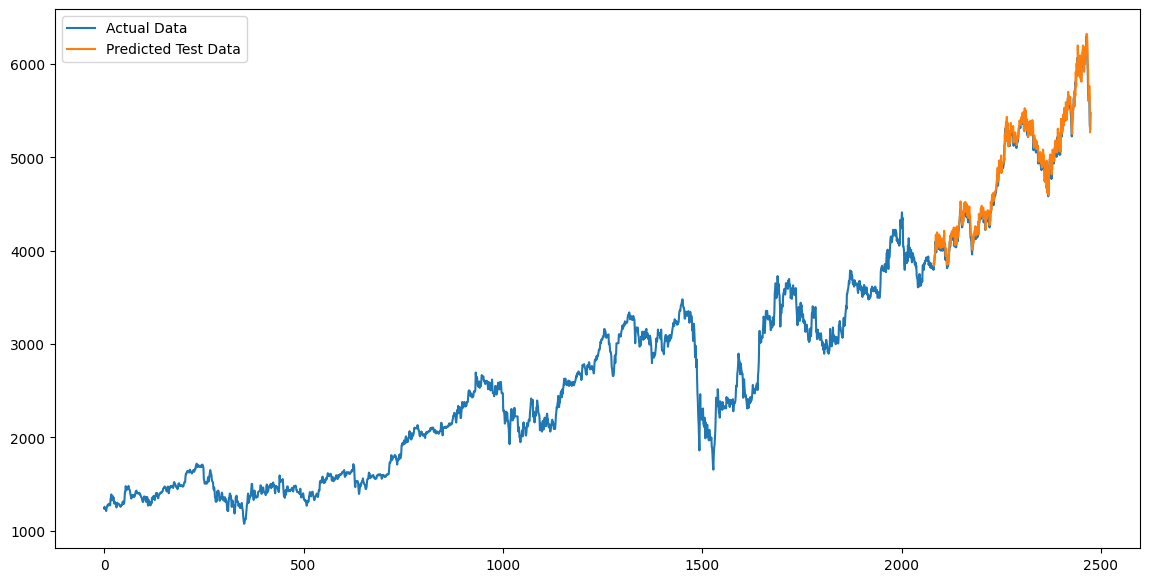

In [ ]:
# Membuat gambar (figure) dengan ukuran 14x7
plt.figure(figsize=(14, 7))
# Membuat plot garis untuk data aktual dengan label 'Actual Data'
plt.plot(bbri_hist3, label='Actual Data')
# Membuat plot garis untuk data prediksi pada dengan label 'Predicted Test Data'
plt.plot(testPredictPlot_bbri_gru, label='Predicted Test Data')
# Menambahkan legenda ke plot berdasarkan label-label yang telah ditentukan sebelumnya
plt.legend()
# Menampilkan plot
plt.show()

In [ ]:
# Fungsi menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Melihat Metric Evaluation RMSE dan MAPE
mape_gru_l4_bbri = mean_absolute_percentage_error(Y_test_bbri_gru,test_predict_bbri_gru)
print("RMSE of gru:", np.sqrt(mean_squared_error(Y_test_bbri_gru,test_predict_bbri_gru)))
print("MAPE of gru:", mape_gru_l4_bbri)

RMSE of gru: 87.12563756781522
MAPE of gru: 1.4476834574696014


### Hyperparameter Tuning & Optimatization Model 5 Layers

In [ ]:
# Mengambil kolom close
bbri_hist2 = bbri_hist['Close']

In [ ]:
# Train-Test Split
train_size = int(len(bbri_hist2) * 0.80)
test_size = len(bbri_hist2) - train_size
train_data_bbri_gru, test_data_bbri_gru = bbri_hist2[:train_size], bbri_hist2[train_size:]

# Scalling data
scaler = MinMaxScaler()
bbri_hist2 = scaler.fit_transform(np.array(bbri_hist2).reshape(-1,1))
train_data_bbri_gru = scaler.fit_transform(np.array(train_data_bbri_gru).reshape(-1, 1))
test_data_bbri_gru = scaler.transform(np.array(test_data_bbri_gru).reshape(-1, 1))

In [ ]:
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
                   a = dataset[i:(i+time_step),0]
                   dataX.append(a)
                   dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [ ]:
# Memanggil fungsi create_dataset untuk membagi data menjadi dataset input dan output dataset dengan times step 100
time_step = 100
X_train_bbri_gru,Y_train_bbri_gru =  create_dataset(train_data_bbri_gru,time_step)
X_test_bbri_gru,Y_test_bbri_gru =  create_dataset(test_data_bbri_gru,time_step)

In [ ]:
Y_train_bbri_gru

array([0.09276678, 0.09276678, 0.08674113, ..., 0.96030638, 0.97448266,
       0.97731773])

In [ ]:
# Memeriksa value
print(X_train_bbri_gru.shape)
print(X_train_bbri_gru)
print(X_test_bbri_gru.shape)
print(Y_test_bbri_gru.shape)

(1879, 100)
[[0.05206461 0.05793246 0.05108668 ... 0.07368551 0.07669833 0.08071544]
 [0.05793246 0.05108668 0.05206461 ... 0.07669833 0.08071544 0.09276678]
 [0.05108668 0.05206461 0.05010862 ... 0.08071544 0.09276678 0.09276678]
 ...
 [0.84523331 0.82887035 0.81523442 ... 0.97731773 0.97731773 0.957471  ]
 [0.82887035 0.81523442 0.81796177 ... 0.97731773 0.957471   0.96030638]
 [0.81523442 0.81796177 0.81250747 ... 0.957471   0.96030638 0.97448266]]
(394, 100)
(394,)


In [ ]:
pip install keras-tuner

In [ ]:
import tensorflow as tf
from kerastuner import HyperModel, RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Tetapkan seed untuk inisialisasi acak
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

# Definisikan fungsi untuk membuat model GRU dengan hyperparameter
def build_model_l5(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_1', min_value=50, max_value=200, step=50),
        return_sequences=True,
        input_shape=(X_train_bbri_gru.shape[1], 1)
    ))
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_2', min_value=50, max_value=200, step=50),
        return_sequences=True
    ))
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_3', min_value=50, max_value=200, step=50),
        return_sequences=True
    ))
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_4', min_value=50, max_value=200, step=50)
    ))
    model.add(tf.keras.layers.Dense(1))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='mean_squared_error'
    )
    return model


In [ ]:
from kerastuner.tuners import RandomSearch

# Atur pencarian hyperparameter menggunakan RandomSearch
tuner = RandomSearch(
    build_model_l5,
    objective='val_loss',
    max_trials=10,  # Jumlah percobaan untuk menemukan kombinasi hyperparameter terbaik
    executions_per_trial=1,  # Jumlah eksekusi per percobaan untuk akurasi lebih baik
    directory='hyperparameter_tuning_l5',
    project_name='gru_tuning_l5'
)

# Tentukan data pelatihan dan validasi
tuner.search(X_train_bbri_gru, Y_train_bbri_gru, validation_data=(X_test_bbri_gru, Y_test_bbri_gru), epochs=30, batch_size=64, verbose=1)

# Mendapatkan hasil terbaik
best_hps_l5 = tuner.get_best_hyperparameters(num_trials=1)[0]

# Membangun model dengan hyperparameter terbaik
model_bbri_gru_l5 = build_model_l5(best_hps_l5)

Trial 10 Complete [00h 15m 32s]
val_loss: 0.0004925010725855827

Best val_loss So Far: 0.0004925010725855827
Total elapsed time: 02h 28m 08s


In [ ]:
print(best_hps_l5)

In [ ]:
# Melihat rangkuman model
model_bbri_gru_l5.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_4 (GRU)                 (None, 100, 100)          30900     
                                                                 
 gru_5 (GRU)                 (None, 100, 100)          60600     
                                                                 
 gru_6 (GRU)                 (None, 100, 150)          113400    
                                                                 
 gru_7 (GRU)                 (None, 200)               211200    
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 416301 (1.59 MB)
Trainable params: 416301 (1.59 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Menetapkan seed untuk TensorFlow untuk memastikan hasil yang konsisten dari operasi stokastik (jika ada)
tf.random.set_seed(seed_value)

# Melatih model menggunakan data pelatihan (X_train_bbri dan Y_train_bbri) dengan data validasi (X_test_bbri dan Y_test_bbri)
# Epochs adalah jumlah kali seluruh dataset akan diberikan kepada model selama proses pelatihan
# Batch_size adalah jumlah sampel data yang akan diproses sebelum pembaharuan bobot model
# verbose = 1 menghasilkan output detail pada setiap epoch selama pelatihan
model_bbri_gru_l5.fit(X_train_bbri_gru, Y_train_bbri_gru, validation_data=(X_test_bbri_gru, Y_test_bbri_gru), epochs=50, batch_size=64, verbose=1)
model_bbri_gru_l5.save("model_bbri_gru_l5.h5")

Epoch 1/50
30/30 [==============================] - 61s 2s/step - loss: 0.0214 - val_loss: 0.0119
Epoch 2/50
30/30 [==============================] - 29s 983ms/step - loss: 0.0013 - val_loss: 0.0019
Epoch 3/50
30/30 [==============================] - 28s 928ms/step - loss: 8.6564e-04 - val_loss: 0.0017
Epoch 4/50
30/30 [==============================] - 29s 965ms/step - loss: 7.3826e-04 - val_loss: 0.0017
Epoch 5/50
30/30 [==============================] - 29s 960ms/step - loss: 6.9650e-04 - val_loss: 0.0023
Epoch 6/50
30/30 [==============================] - 29s 990ms/step - loss: 6.6570e-04 - val_loss: 0.0011
Epoch 7/50
30/30 [==============================] - 29s 984ms/step - loss: 6.7168e-04 - val_loss: 0.0017
Epoch 8/50
30/30 [==============================] - 30s 1s/step - loss: 6.2240e-04 - val_loss: 0.0016
Epoch 9/50
30/30 [==============================] - 29s 990ms/step - loss: 5.4392e-04 - val_loss: 0.0014
Epoch 10/50
30/30 [==============================] - 30s 992ms/step -

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Memprediksi data menggunakan model yang telah dilatih
train_predict_bbri_gru = model_bbri_gru_l5.predict(X_train_bbri_gru)
test_predict_bbri_gru = model_bbri_gru_l5.predict(X_test_bbri_gru)

13/13 [==============================] - 2s 137ms/step


In [ ]:
Y_train_bbri_gru[:5]

array([0.09276678, 0.09276678, 0.08674113, 0.08473252, 0.09176253])

In [ ]:
train_predict_bbri_gru[:5]

array([[0.08389919],
       [0.09268725],
       [0.09514052],
       [0.09199127],
       [0.0899004 ]], dtype=float32)

In [ ]:
# Transformasi data ke bentuk awal
Y_train_bbri_gru = scaler.inverse_transform(Y_train_bbri_gru.reshape(-1, 1))
Y_test_bbri_gru = scaler.inverse_transform(Y_test_bbri_gru.reshape(-1, 1))
train_predict_bbri_gru = scaler.inverse_transform(train_predict_bbri_gru)
test_predict_bbri_gru = scaler.inverse_transform(test_predict_bbri_gru)

In [ ]:
Y_test_bbri_gru[:5]

array([[3795.79614258],
       [3804.72753906],
       [3876.17749023],
       [3920.83374023],
       [3974.421875  ]])

In [ ]:
test_predict_bbri_gru[:5]

array([[3860.0125],
       [3835.37  ],
       [3854.3962],
       [3939.6743],
       [3971.0686]], dtype=float32)

In [ ]:
# Mendefinisikan jumlah langkah waktu sebelumnya yang akan digunakan sebagai input untuk memprediksi langkah waktu saat ini
look_back = 100

# Membuat array kosong dengan ukuran yang sama dengan bbri_hist2
trainPredictPlot_bbri = np.empty_like(bbri_hist2)
# Mengisi array dengan nilai yang sama dengan NaN (untuk plot)
trainPredictPlot_bbri[:,:] = np.nan
# Mengisi bagian dari array dengan hasil prediksi pada data pelatihan
# Menempatkan hasil prediksi pada posisi yang sesuai dalam array untuk plotting
trainPredictPlot_bbri[look_back : len(train_predict_bbri_gru)+look_back,:] = train_predict_bbri_gru

# Membuat array kosong dengan ukuran yang sama dengan bbri_hist2
testPredictPlot_bbri_gru = np.empty_like(bbri_hist2)
# Mengisi array dengan nilai yang sama dengan NaN (untuk plot)
testPredictPlot_bbri_gru[:,:] = np.nan
# Mengisi bagian dari array dengan hasil prediksi pada data uji
# Menempatkan hasil prediksi pada posisi yang sesuai dalam array untuk plotting
testPredictPlot_bbri_gru[len(train_predict_bbri_gru) + (look_back) * 2 + 1 : len(bbri_hist2) - 1, :] = test_predict_bbri_gru

In [ ]:
# Mengambil data harga saham close dan dijadikan dalam bentuk array numpy
bbri_hist3=bbri_hist['Close'].to_numpy()

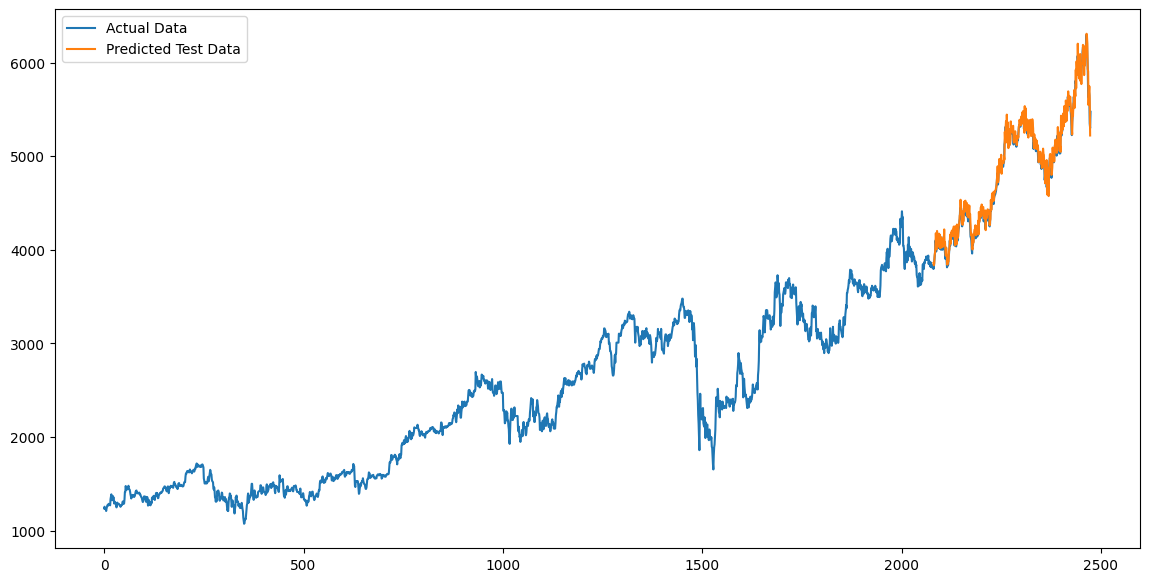

In [ ]:
# Membuat gambar (figure) dengan ukuran 14x7
plt.figure(figsize=(14, 7))
# Membuat plot garis untuk data aktual dengan label 'Actual Data'
plt.plot(bbri_hist3, label='Actual Data')
# Membuat plot garis untuk data prediksi pada dengan label 'Predicted Test Data'
plt.plot(testPredictPlot_bbri_gru, label='Predicted Test Data')
# Menambahkan legenda ke plot berdasarkan label-label yang telah ditentukan sebelumnya
plt.legend()
# Menampilkan plot
plt.show()

In [ ]:
# Fungsi menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Melihat Metric Evaluation RMSE dan MAPE
mape_gru_l5_bbri = mean_absolute_percentage_error(Y_test_bbri_gru,test_predict_bbri_gru)
print("RMSE of gru:", np.sqrt(mean_squared_error(Y_test_bbri_gru,test_predict_bbri_gru)))
print("MAPE of gru:", mape_gru_l5_bbri)

RMSE of gru: 87.29310958076334
MAPE of gru: 1.440547113725797


### Hyperparameter Tuning & Optimatization Model 6 Layers

In [ ]:
# Mengambil kolom close
bbri_hist2 = bbri_hist['Close']

In [ ]:
# Train-Test Split
train_size = int(len(bbri_hist2) * 0.80)
test_size = len(bbri_hist2) - train_size
train_data_bbri_gru, test_data_bbri_gru = bbri_hist2[:train_size], bbri_hist2[train_size:]

# Scalling data
scaler = MinMaxScaler()
bbri_hist2 = scaler.fit_transform(np.array(bbri_hist2).reshape(-1,1))
train_data_bbri_gru = scaler.fit_transform(np.array(train_data_bbri_gru).reshape(-1, 1))
test_data_bbri_gru = scaler.transform(np.array(test_data_bbri_gru).reshape(-1, 1))

In [ ]:
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
                   a = dataset[i:(i+time_step),0]
                   dataX.append(a)
                   dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [ ]:
# Memanggil fungsi create_dataset untuk membagi data menjadi dataset input dan output dataset dengan times step 100
time_step = 100
X_train_bbri_gru,Y_train_bbri_gru =  create_dataset(train_data_bbri_gru,time_step)
X_test_bbri_gru,Y_test_bbri_gru =  create_dataset(test_data_bbri_gru,time_step)

In [ ]:
Y_train_bbri_gru

array([0.09276678, 0.09276678, 0.08674113, ..., 0.96030638, 0.97448266,
       0.97731773])

In [ ]:
# Memeriksa value
print(X_train_bbri_gru.shape)
print(X_train_bbri_gru)
print(X_test_bbri_gru.shape)
print(Y_test_bbri_gru.shape)

(1879, 100)
[[0.05206461 0.05793246 0.05108668 ... 0.07368551 0.07669833 0.08071544]
 [0.05793246 0.05108668 0.05206461 ... 0.07669833 0.08071544 0.09276678]
 [0.05108668 0.05206461 0.05010862 ... 0.08071544 0.09276678 0.09276678]
 ...
 [0.84523331 0.82887035 0.81523442 ... 0.97731773 0.97731773 0.957471  ]
 [0.82887035 0.81523442 0.81796177 ... 0.97731773 0.957471   0.96030638]
 [0.81523442 0.81796177 0.81250747 ... 0.957471   0.96030638 0.97448266]]
(394, 100)
(394,)


In [ ]:
pip install keras-tuner

In [ ]:
import tensorflow as tf
from kerastuner import HyperModel, RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Tetapkan seed untuk inisialisasi acak
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

# Definisikan fungsi untuk membuat model GRU dengan hyperparameter
def build_model_l6(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_1', min_value=50, max_value=200, step=50),
        return_sequences=True,
        input_shape=(X_train_bbri_gru.shape[1], 1)
    ))
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_2', min_value=50, max_value=200, step=50),
        return_sequences=True
    ))
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_3', min_value=50, max_value=200, step=50),
        return_sequences=True
    ))
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_4', min_value=50, max_value=200, step=50),
        return_sequences=True
    ))
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_5', min_value=50, max_value=200, step=50)
    ))
    model.add(tf.keras.layers.Dense(1))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='mean_squared_error'
    )
    return model


In [ ]:
from kerastuner.tuners import RandomSearch

# Atur pencarian hyperparameter menggunakan RandomSearch
tuner = RandomSearch(
    build_model_l6,
    objective='val_loss',
    max_trials=10,  # Jumlah percobaan untuk menemukan kombinasi hyperparameter terbaik
    executions_per_trial=1,  # Jumlah eksekusi per percobaan untuk akurasi lebih baik
    directory='hyperparameter_tuning_l6',
    project_name='gru_tuning_l6'
)

# Tentukan data pelatihan dan validasi
tuner.search(X_train_bbri_gru, Y_train_bbri_gru, validation_data=(X_test_bbri_gru, Y_test_bbri_gru), epochs=30, batch_size=66, verbose=1)

# Mendapatkan hasil terbaik
best_hps_l6 = tuner.get_best_hyperparameters(num_trials=1)[0]

# Membangun model dengan hyperparameter terbaik
model_bbri_gru_l6 = build_model_l6(best_hps_l6)

Trial 10 Complete [00h 15m 35s]
val_loss: 0.000623447063844651

Best val_loss So Far: 0.0005335446330718696
Total elapsed time: 02h 35m 45s


In [ ]:
print(best_hps_l6)

In [ ]:
# Melihat rangkuman model
model_bbri_gru_l6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 100, 100)          30900     
                                                                 
 gru_6 (GRU)                 (None, 100, 150)          113400    
                                                                 
 gru_7 (GRU)                 (None, 100, 200)          211200    
                                                                 
 gru_8 (GRU)                 (None, 100, 200)          241200    
                                                                 
 gru_9 (GRU)                 (None, 150)               158400    
                                                                 
 dense_1 (Dense)             (None, 1)                 151       
                                                                 
Total params: 755251 (2.88 MB)
Trainable params: 75525

In [ ]:
# Menetapkan seed untuk TensorFlow untuk memastikan hasil yang konsisten dari operasi stokastik (jika ada)
tf.random.set_seed(seed_value)

# Melatih model menggunakan data pelatihan (X_train_bbri dan Y_train_bbri) dengan data validasi (X_test_bbri dan Y_test_bbri)
# Epochs adalah jumlah kali seluruh dataset akan diberikan kepada model selama proses pelatihan
# Batch_size adalah jumlah sampel data yang akan diproses sebelum pembaharuan bobot model
# verbose = 1 menghasilkan output detail pada setiap epoch selama pelatihan
model_bbri_gru_l6.fit(X_train_bbri_gru, Y_train_bbri_gru, validation_data=(X_test_bbri_gru, Y_test_bbri_gru), epochs=50, batch_size=64, verbose=1)
model_bbri_gru_l6.save("model_bbri_gru_l6.h5")

Epoch 1/50
30/30 [==============================] - 76s 2s/step - loss: 0.0269 - val_loss: 0.0220
Epoch 2/50
30/30 [==============================] - 44s 1s/step - loss: 0.0019 - val_loss: 0.0030
Epoch 3/50
30/30 [==============================] - 45s 1s/step - loss: 0.0010 - val_loss: 0.0020
Epoch 4/50
30/30 [==============================] - 44s 1s/step - loss: 8.6100e-04 - val_loss: 0.0020
Epoch 5/50
30/30 [==============================] - 45s 2s/step - loss: 8.0110e-04 - val_loss: 0.0034
Epoch 6/50
30/30 [==============================] - 45s 2s/step - loss: 7.7179e-04 - val_loss: 0.0011
Epoch 7/50
30/30 [==============================] - 43s 1s/step - loss: 7.9901e-04 - val_loss: 0.0019
Epoch 8/50
30/30 [==============================] - 56s 2s/step - loss: 6.9462e-04 - val_loss: 0.0018
Epoch 9/50
30/30 [==============================] - 45s 1s/step - loss: 6.0229e-04 - val_loss: 0.0017
Epoch 10/50
30/30 [==============================] - 44s 1s/step - loss: 5.5181e-04 - val_loss

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Memprediksi data menggunakan model yang telah dilatih
train_predict_bbri_gru = model_bbri_gru_l6.predict(X_train_bbri_gru)
test_predict_bbri_gru = model_bbri_gru_l6.predict(X_test_bbri_gru)

13/13 [==============================] - 3s 241ms/step


In [ ]:
Y_train_bbri_gru[:5]

array([0.09276678, 0.09276678, 0.08674113, 0.08473252, 0.09176253])

In [ ]:
train_predict_bbri_gru[:5]

array([[0.08105544],
       [0.0896306 ],
       [0.09236803],
       [0.08957066],
       [0.0873338 ]], dtype=float32)

In [ ]:
# Transformasi data ke bentuk awal
Y_train_bbri_gru = scaler.inverse_transform(Y_train_bbri_gru.reshape(-1, 1))
Y_test_bbri_gru = scaler.inverse_transform(Y_test_bbri_gru.reshape(-1, 1))
train_predict_bbri_gru = scaler.inverse_transform(train_predict_bbri_gru)
test_predict_bbri_gru = scaler.inverse_transform(test_predict_bbri_gru)

In [ ]:
Y_test_bbri_gru[:5]

array([[3795.79614258],
       [3804.72753906],
       [3876.17749023],
       [3920.83374023],
       [3974.421875  ]])

In [ ]:
test_predict_bbri_gru[:5]

array([[3849.3198],
       [3824.298 ],
       [3844.501 ],
       [3930.953 ],
       [3962.5598]], dtype=float32)

In [ ]:
# Mendefinisikan jumlah langkah waktu sebelumnya yang akan digunakan sebagai input untuk memprediksi langkah waktu saat ini
look_back = 100

# Membuat array kosong dengan ukuran yang sama dengan bbri_hist2
trainPredictPlot_bbri = np.empty_like(bbri_hist2)
# Mengisi array dengan nilai yang sama dengan NaN (untuk plot)
trainPredictPlot_bbri[:,:] = np.nan
# Mengisi bagian dari array dengan hasil prediksi pada data pelatihan
# Menempatkan hasil prediksi pada posisi yang sesuai dalam array untuk plotting
trainPredictPlot_bbri[look_back : len(train_predict_bbri_gru)+look_back,:] = train_predict_bbri_gru

# Membuat array kosong dengan ukuran yang sama dengan bbri_hist2
testPredictPlot_bbri_gru = np.empty_like(bbri_hist2)
# Mengisi array dengan nilai yang sama dengan NaN (untuk plot)
testPredictPlot_bbri_gru[:,:] = np.nan
# Mengisi bagian dari array dengan hasil prediksi pada data uji
# Menempatkan hasil prediksi pada posisi yang sesuai dalam array untuk plotting
testPredictPlot_bbri_gru[len(train_predict_bbri_gru) + (look_back) * 2 + 1 : len(bbri_hist2) - 1, :] = test_predict_bbri_gru

In [ ]:
# Mengambil data harga saham close dan dijadikan dalam bentuk array numpy
bbri_hist3=bbri_hist['Close'].to_numpy()

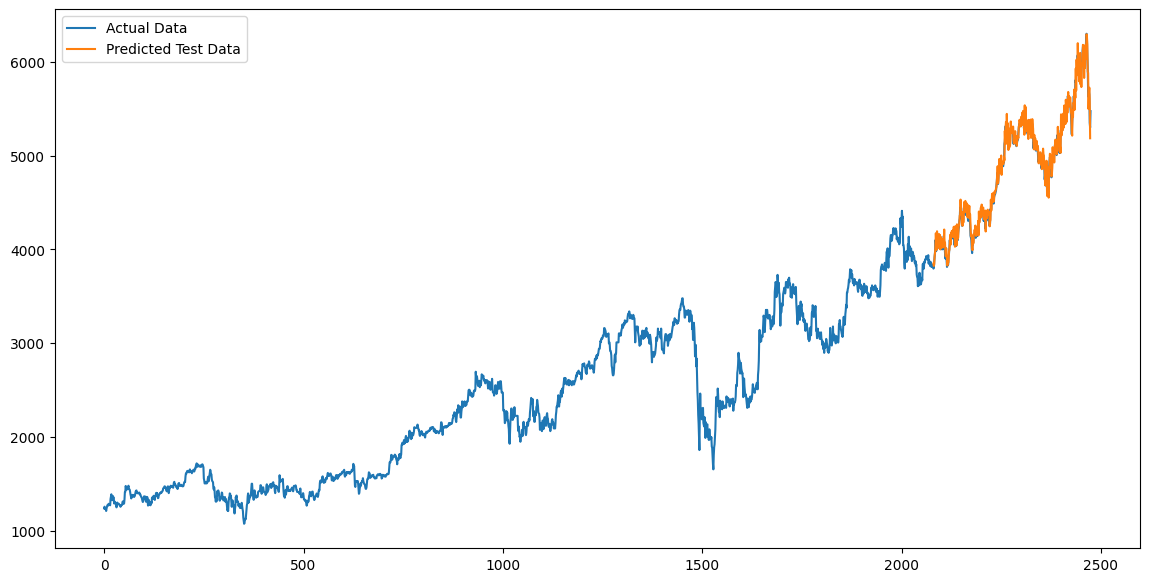

In [ ]:
# Membuat gambar (figure) dengan ukuran 14x7
plt.figure(figsize=(14, 7))
# Membuat plot garis untuk data aktual dengan label 'Actual Data'
plt.plot(bbri_hist3, label='Actual Data')
# Membuat plot garis untuk data prediksi pada dengan label 'Predicted Test Data'
plt.plot(testPredictPlot_bbri_gru, label='Predicted Test Data')
# Menambahkan legenda ke plot berdasarkan label-label yang telah ditentukan sebelumnya
plt.legend()
# Menampilkan plot
plt.show()

In [ ]:
# Fungsi menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Melihat Metric Evaluation RMSE dan MAPE
mape_gru_l6_bbri = mean_absolute_percentage_error(Y_test_bbri_gru,test_predict_bbri_gru)
print("RMSE of gru:", np.sqrt(mean_squared_error(Y_test_bbri_gru,test_predict_bbri_gru)))
print("MAPE of gru:", mape_gru_l6_bbri)

RMSE of gru: 87.35591500019663
MAPE of gru: 1.4213546424469836


##Kesimpulan

- Layer 3:
 - RMSE of gru: 87.79228265710745
 - MAPE of gru: 1.4182421977063109
- Layer 4:
 - RMSE of gru: 87.12563756781522
 - MAPE of gru: 1.4476834574696014
- Layer 5:
 - RMSE of gru: 87.29310958076334
 - MAPE of gru: 1.440547113725797
- Layer 6:
 - RMSE of gru: 87.35591500019663
 - MAPE of gru: 1.4213546424469836


##Bank Bank 2

### Hyperparameter Tuning & Optimatization Model 4 Layers

In [ ]:
# Mengambil kolom close
bbtn_hist2 = bbtn_hist['Close']

In [ ]:
# Train-Test Split
train_size = int(len(bbtn_hist2) * 0.80)
test_size = len(bbtn_hist2) - train_size
train_data_bbtn_gru, test_data_bbtn_gru = bbtn_hist2[:train_size], bbtn_hist2[train_size:]

# Scalling data
scaler = MinMaxScaler()
bbtn_hist2 = scaler.fit_transform(np.array(bbtn_hist2).reshape(-1,1))
train_data_bbtn_gru = scaler.fit_transform(np.array(train_data_bbtn_gru).reshape(-1, 1))
test_data_bbtn_gru = scaler.transform(np.array(test_data_bbtn_gru).reshape(-1, 1))

In [ ]:
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
                   a = dataset[i:(i+time_step),0]
                   dataX.append(a)
                   dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [ ]:
# Memanggil fungsi create_dataset untuk membagi data menjadi dataset input dan output dataset dengan times step 100
time_step = 100
X_train_bbtn_gru,Y_train_bbtn_gru =  create_dataset(train_data_bbtn_gru,time_step)
X_test_bbtn_gru,Y_test_bbtn_gru =  create_dataset(test_data_bbtn_gru,time_step)

In [ ]:
Y_train_bbtn_gru

array([0.09608287, 0.09300894, 0.08993499, ..., 0.33169535, 0.3334145 ,
       0.32825709])

In [ ]:
# Memeriksa value
print(X_train_bbtn_gru.shape)
print(X_train_bbtn_gru)
print(X_test_bbtn_gru.shape)
print(Y_test_bbtn_gru.shape)

(1879, 100)
[[0.15295062 0.15141374 0.14833976 ... 0.07610231 0.07917619 0.09147198]
 [0.15141374 0.14833976 0.11913736 ... 0.07917619 0.09147198 0.09608287]
 [0.14833976 0.11913736 0.12528524 ... 0.09147198 0.09608287 0.09300894]
 ...
 [0.35121748 0.33764378 0.33934053 ... 0.34888668 0.34544842 0.34372927]
 [0.33764378 0.33934053 0.35121748 ... 0.34544842 0.34372927 0.33169535]
 [0.33934053 0.35121748 0.35461084 ... 0.34372927 0.33169535 0.3334145 ]]
(394, 100)
(394,)


In [ ]:
pip install keras-tuner

In [ ]:
import tensorflow as tf
from kerastuner import HyperModel, RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Tetapkan seed untuk inisialisasi acak
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

# Definisikan fungsi untuk membuat model GRU dengan hyperparameter
def build_model_l4(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_1', min_value=50, max_value=200, step=50),
        return_sequences=True,
        input_shape=(X_train_bbtn_gru.shape[1], 1)
    ))
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_2', min_value=50, max_value=200, step=50),
        return_sequences=True
    ))
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_3', min_value=50, max_value=200, step=50)
    ))
    model.add(tf.keras.layers.Dense(1))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='mean_squared_error'
    )
    return model


In [ ]:
from kerastuner.tuners import RandomSearch

# Atur pencarian hyperparameter menggunakan RandomSearch
tuner = RandomSearch(
    build_model_l4,
    objective='val_loss',
    max_trials=10,  # Jumlah percobaan untuk menemukan kombinasi hyperparameter terbaik
    executions_per_trial=1,  # Jumlah eksekusi per percobaan untuk akurasi lebih baik
    directory='hyperparameter_tuning_l4_btn',
    project_name='gru_tuning_l4_btn'
)

# Tentukan data pelatihan dan validasi
tuner.search(X_train_bbtn_gru, Y_train_bbtn_gru, validation_data=(X_test_bbtn_gru, Y_test_bbtn_gru), epochs=30, batch_size=64, verbose=1)

# Mendapatkan hasil terbaik
best_hps_l4 = tuner.get_best_hyperparameters(num_trials=1)[0]

# Membangun model dengan hyperparameter terbaik
model_bbtn_gru_l4 = build_model_l4(best_hps_l4)

Trial 10 Complete [00h 11m 30s]
val_loss: 0.0004319706349633634

Best val_loss So Far: 8.953364886110649e-05
Total elapsed time: 01h 38m 41s


In [ ]:
print(best_hps_l4)

In [ ]:
# Melihat rangkuman model
model_bbtn_gru_l4.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 100, 50)           7950      
                                                                 
 gru_4 (GRU)                 (None, 100, 50)           15300     
                                                                 
 gru_5 (GRU)                 (None, 200)               151200    
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 174651 (682.23 KB)
Trainable params: 174651 (682.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Menetapkan seed untuk TensorFlow untuk memastikan hasil yang konsisten dari operasi stokastik (jika ada)
tf.random.set_seed(seed_value)

# Melatih model menggunakan data pelatihan (X_train_bbtn dan Y_train_bbtn) dengan data validasi (X_test_bbtn dan Y_test_bbtn)
# Epochs adalah jumlah kali seluruh dataset akan diberikan kepada model selama proses pelatihan
# Batch_size adalah jumlah sampel data yang akan diproses sebelum pembaharuan bobot model
# verbose = 1 menghasilkan output detail pada setiap epoch selama pelatihan
model_bbtn_gru_l4.fit(X_train_bbtn_gru, Y_train_bbtn_gru, validation_data=(X_test_bbtn_gru, Y_test_bbtn_gru), epochs=50, batch_size=64, verbose=1)
model_bbtn_gru_l4.save("model_bbtn_gru_l4.h5")

Epoch 1/50
30/30 [==============================] - 40s 1s/step - loss: 0.0759 - val_loss: 2.0215e-04
Epoch 2/50
30/30 [==============================] - 16s 525ms/step - loss: 0.0012 - val_loss: 1.8058e-04
Epoch 3/50
30/30 [==============================] - 13s 438ms/step - loss: 4.4432e-04 - val_loss: 1.5009e-04
Epoch 4/50
30/30 [==============================] - 12s 418ms/step - loss: 3.9950e-04 - val_loss: 1.7285e-04
Epoch 5/50
30/30 [==============================] - 12s 416ms/step - loss: 3.8789e-04 - val_loss: 1.2185e-04
Epoch 6/50
30/30 [==============================] - 11s 356ms/step - loss: 3.4117e-04 - val_loss: 1.3378e-04
Epoch 7/50
30/30 [==============================] - 13s 414ms/step - loss: 3.3036e-04 - val_loss: 1.3830e-04
Epoch 8/50
30/30 [==============================] - 13s 431ms/step - loss: 3.2003e-04 - val_loss: 1.0853e-04
Epoch 9/50
30/30 [==============================] - 12s 418ms/step - loss: 3.1096e-04 - val_loss: 1.4556e-04
Epoch 10/50
30/30 [===========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Memprediksi data menggunakan model yang telah dilatih
train_predict_bbtn_gru = model_bbtn_gru_l4.predict(X_train_bbtn_gru)
test_predict_bbtn_gru = model_bbtn_gru_l4.predict(X_test_bbtn_gru)

13/13 [==============================] - 1s 95ms/step


In [ ]:
Y_train_bbtn_gru[:5]

array([0.09608287, 0.09300894, 0.08993499, 0.09147198, 0.10684162])

In [ ]:
train_predict_bbtn_gru[:5]

array([[0.08951265],
       [0.09377339],
       [0.09123581],
       [0.08875769],
       [0.09025095]], dtype=float32)

In [ ]:
# Transformasi data ke bentuk awal
Y_train_bbtn_gru = scaler.inverse_transform(Y_train_bbtn_gru.reshape(-1, 1))
Y_test_bbtn_gru = scaler.inverse_transform(Y_test_bbtn_gru.reshape(-1, 1))
train_predict_bbtn_gru = scaler.inverse_transform(train_predict_bbtn_gru)
test_predict_bbtn_gru = scaler.inverse_transform(test_predict_bbtn_gru)

In [ ]:
Y_test_bbtn_gru[:5]

array([[1247.94470215],
       [1247.94470215],
       [1243.8125    ],
       [1276.8704834 ],
       [1276.8704834 ]])

In [ ]:
test_predict_bbtn_gru[:5]

array([[1244.2286],
       [1237.3894],
       [1236.7065],
       [1232.4908],
       [1265.3624]], dtype=float32)

In [ ]:
# Mendefinisikan jumlah langkah waktu sebelumnya yang akan digunakan sebagai input untuk memprediksi langkah waktu saat ini
look_back = 100

# Membuat array kosong dengan ukuran yang sama dengan bbtn_hist2
trainPredictPlot_bbtn = np.empty_like(bbtn_hist2)
# Mengisi array dengan nilai yang sama dengan NaN (untuk plot)
trainPredictPlot_bbtn[:,:] = np.nan
# Mengisi bagian dari array dengan hasil prediksi pada data pelatihan
# Menempatkan hasil prediksi pada posisi yang sesuai dalam array untuk plotting
trainPredictPlot_bbtn[look_back : len(train_predict_bbtn_gru)+look_back,:] = train_predict_bbtn_gru

# Membuat array kosong dengan ukuran yang sama dengan bbtn_hist2
testPredictPlot_bbtn_gru = np.empty_like(bbtn_hist2)
# Mengisi array dengan nilai yang sama dengan NaN (untuk plot)
testPredictPlot_bbtn_gru[:,:] = np.nan
# Mengisi bagian dari array dengan hasil prediksi pada data uji
# Menempatkan hasil prediksi pada posisi yang sesuai dalam array untuk plotting
testPredictPlot_bbtn_gru[len(train_predict_bbtn_gru) + (look_back) * 2 + 1 : len(bbtn_hist2) - 1, :] = test_predict_bbtn_gru

In [ ]:
# Mengambil data harga saham close dan dijadikan dalam bentuk array numpy
bbtn_hist3=bbtn_hist['Close'].to_numpy()

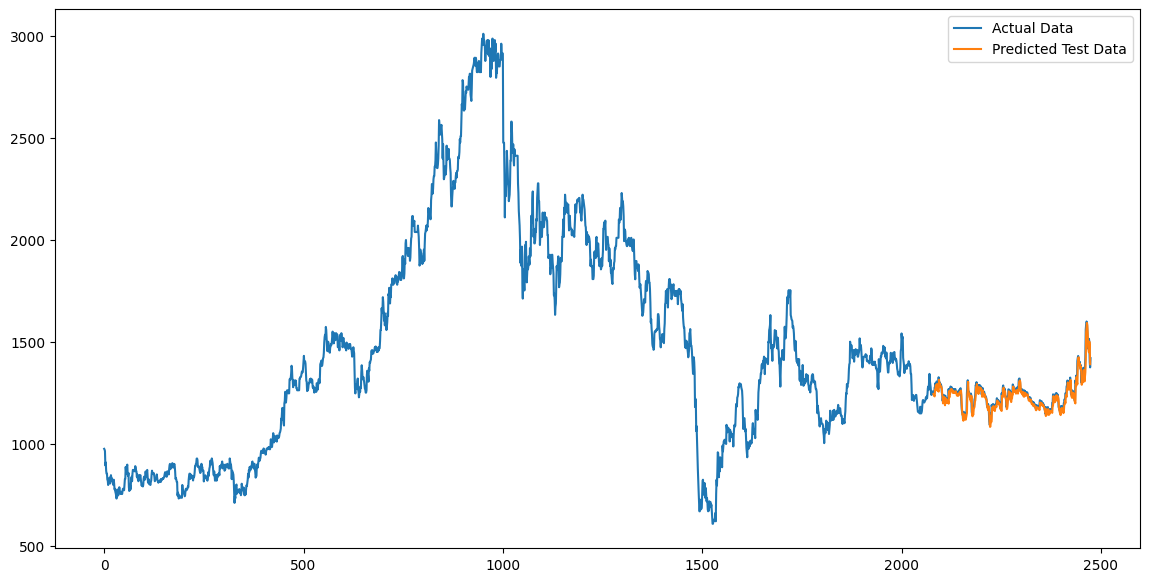

In [ ]:
# Membuat gambar (figure) dengan ukuran 14x7
plt.figure(figsize=(14, 7))
# Membuat plot garis untuk data aktual dengan label 'Actual Data'
plt.plot(bbtn_hist3, label='Actual Data')
# Membuat plot garis untuk data prediksi pada dengan label 'Predicted Test Data'
plt.plot(testPredictPlot_bbtn_gru, label='Predicted Test Data')
# Menambahkan legenda ke plot berdasarkan label-label yang telah ditentukan sebelumnya
plt.legend()
# Menampilkan plot
plt.show()

In [ ]:
# Fungsi menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Melihat Metric Evaluation RMSE dan MAPE
mape_gru_l4_bbtn = mean_absolute_percentage_error(Y_test_bbtn_gru,test_predict_bbtn_gru)
print("RMSE of gru:", np.sqrt(mean_squared_error(Y_test_bbtn_gru,test_predict_bbtn_gru)))
print("MAPE of gru:", mape_gru_l4_bbtn)

RMSE of gru: 25.306044284879604
MAPE of gru: 1.3664863287607905


### Hyperparameter Tuning & Optimatization Model 5 Layers

In [ ]:
# Mengambil kolom close
bbtn_hist2 = bbtn_hist['Close']

In [ ]:
# Train-Test Split
train_size = int(len(bbtn_hist2) * 0.80)
test_size = len(bbtn_hist2) - train_size
train_data_bbtn_gru, test_data_bbtn_gru = bbtn_hist2[:train_size], bbtn_hist2[train_size:]

# Scalling data
scaler = MinMaxScaler()
bbtn_hist2 = scaler.fit_transform(np.array(bbtn_hist2).reshape(-1,1))
train_data_bbtn_gru = scaler.fit_transform(np.array(train_data_bbtn_gru).reshape(-1, 1))
test_data_bbtn_gru = scaler.transform(np.array(test_data_bbtn_gru).reshape(-1, 1))

In [ ]:
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
                   a = dataset[i:(i+time_step),0]
                   dataX.append(a)
                   dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [ ]:
# Memanggil fungsi create_dataset untuk membagi data menjadi dataset input dan output dataset dengan times step 100
time_step = 100
X_train_bbtn_gru,Y_train_bbtn_gru =  create_dataset(train_data_bbtn_gru,time_step)
X_test_bbtn_gru,Y_test_bbtn_gru =  create_dataset(test_data_bbtn_gru,time_step)

In [ ]:
Y_train_bbtn_gru

array([0.09608287, 0.09300894, 0.08993499, ..., 0.33169535, 0.3334145 ,
       0.32825709])

In [ ]:
# Memeriksa value
print(X_train_bbtn_gru.shape)
print(X_train_bbtn_gru)
print(X_test_bbtn_gru.shape)
print(Y_test_bbtn_gru.shape)

(1879, 100)
[[0.15295062 0.15141374 0.14833976 ... 0.07610231 0.07917619 0.09147198]
 [0.15141374 0.14833976 0.11913736 ... 0.07917619 0.09147198 0.09608287]
 [0.14833976 0.11913736 0.12528524 ... 0.09147198 0.09608287 0.09300894]
 ...
 [0.35121748 0.33764378 0.33934053 ... 0.34888668 0.34544842 0.34372927]
 [0.33764378 0.33934053 0.35121748 ... 0.34544842 0.34372927 0.33169535]
 [0.33934053 0.35121748 0.35461084 ... 0.34372927 0.33169535 0.3334145 ]]
(394, 100)
(394,)


In [ ]:
pip install keras-tuner

In [ ]:
import tensorflow as tf
from kerastuner import HyperModel, RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Tetapkan seed untuk inisialisasi acak
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

# Definisikan fungsi untuk membuat model GRU dengan hyperparameter
def build_model_l5(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_1', min_value=50, max_value=200, step=50),
        return_sequences=True,
        input_shape=(X_train_bbtn_gru.shape[1], 1)
    ))
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_2', min_value=50, max_value=200, step=50),
        return_sequences=True
    ))
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_3', min_value=50, max_value=200, step=50),
        return_sequences=True
    ))
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_4', min_value=50, max_value=200, step=50)
    ))
    model.add(tf.keras.layers.Dense(1))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='mean_squared_error'
    )
    return model


In [ ]:
from kerastuner.tuners import RandomSearch

# Atur pencarian hyperparameter menggunakan RandomSearch
tuner = RandomSearch(
    build_model_l5,
    objective='val_loss',
    max_trials=10,  # Jumlah percobaan untuk menemukan kombinasi hyperparameter terbaik
    executions_per_trial=1,  # Jumlah eksekusi per percobaan untuk akurasi lebih baik
    directory='hyperparameter_tuning_l5_btn',
    project_name='gru_tuning_l5_btn'
)

# Tentukan data pelatihan dan validasi
tuner.search(X_train_bbtn_gru, Y_train_bbtn_gru, validation_data=(X_test_bbtn_gru, Y_test_bbtn_gru), epochs=30, batch_size=64, verbose=1)

# Mendapatkan hasil terbaik
best_hps_l5 = tuner.get_best_hyperparameters(num_trials=1)[0]

# Membangun model dengan hyperparameter terbaik
model_bbtn_gru_l5 = build_model_l5(best_hps_l5)

Reloading Tuner from hyperparameter_tuning_l5_btn/gru_tuning_l5_btn/tuner0.json


In [ ]:
print(best_hps_l5)

In [ ]:
# Melihat rangkuman model
model_bbtn_gru_l5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_10 (GRU)                (None, 100, 150)          68850     
                                                                 
 gru_11 (GRU)                (None, 100, 100)          75600     
                                                                 
 gru_12 (GRU)                (None, 100, 50)           22800     
                                                                 
 gru_13 (GRU)                (None, 150)               90900     
                                                                 
 dense_2 (Dense)             (None, 1)                 151       
                                                                 
Total params: 258301 (1008.99 KB)
Trainable params: 258301 (1008.99 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Menetapkan seed untuk TensorFlow untuk memastikan hasil yang konsisten dari operasi stokastik (jika ada)
tf.random.set_seed(seed_value)

# Melatih model menggunakan data pelatihan (X_train_bbtn dan Y_train_bbtn) dengan data validasi (X_test_bbtn dan Y_test_bbtn)
# Epochs adalah jumlah kali seluruh dataset akan diberikan kepada model selama proses pelatihan
# Batch_size adalah jumlah sampel data yang akan diproses sebelum pembaharuan bobot model
# verbose = 1 menghasilkan output detail pada setiap epoch selama pelatihan
model_bbtn_gru_l5.fit(X_train_bbtn_gru, Y_train_bbtn_gru, validation_data=(X_test_bbtn_gru, Y_test_bbtn_gru), epochs=50, batch_size=64, verbose=1)
model_bbtn_gru_l5.save("model_bbtn_gru_l5.h5")

Epoch 1/50
30/30 [==============================] - 32s 798ms/step - loss: 0.1474 - val_loss: 2.3747e-04
Epoch 2/50
30/30 [==============================] - 20s 668ms/step - loss: 0.0019 - val_loss: 2.1601e-04
Epoch 3/50
30/30 [==============================] - 23s 772ms/step - loss: 5.2544e-04 - val_loss: 1.6211e-04
Epoch 4/50
30/30 [==============================] - 20s 661ms/step - loss: 4.3415e-04 - val_loss: 1.2416e-04
Epoch 5/50
30/30 [==============================] - 21s 720ms/step - loss: 3.7918e-04 - val_loss: 3.9044e-04
Epoch 6/50
30/30 [==============================] - 20s 657ms/step - loss: 3.7036e-04 - val_loss: 1.0180e-04
Epoch 7/50
30/30 [==============================] - 20s 659ms/step - loss: 3.1401e-04 - val_loss: 1.0603e-04
Epoch 8/50
30/30 [==============================] - 22s 720ms/step - loss: 2.8631e-04 - val_loss: 1.1814e-04
Epoch 9/50
30/30 [==============================] - 20s 660ms/step - loss: 3.2798e-04 - val_loss: 1.6727e-04
Epoch 10/50
30/30 [========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Memprediksi data menggunakan model yang telah dilatih
train_predict_bbtn_gru = model_bbtn_gru_l5.predict(X_train_bbtn_gru)
test_predict_bbtn_gru = model_bbtn_gru_l5.predict(X_test_bbtn_gru)

13/13 [==============================] - 2s 116ms/step


In [ ]:
Y_train_bbtn_gru[:5]

array([0.09608287, 0.09300894, 0.08993499, 0.09147198, 0.10684162])

In [ ]:
train_predict_bbtn_gru[:5]

array([[0.09577338],
       [0.09988084],
       [0.09810217],
       [0.09644087],
       [0.09828831]], dtype=float32)

In [ ]:
# Transformasi data ke bentuk awal
Y_train_bbtn_gru = scaler.inverse_transform(Y_train_bbtn_gru.reshape(-1, 1))
Y_test_bbtn_gru = scaler.inverse_transform(Y_test_bbtn_gru.reshape(-1, 1))
train_predict_bbtn_gru = scaler.inverse_transform(train_predict_bbtn_gru)
test_predict_bbtn_gru = scaler.inverse_transform(test_predict_bbtn_gru)

In [ ]:
Y_test_bbtn_gru[:5]

array([[1247.94470215],
       [1247.94470215],
       [1243.8125    ],
       [1276.8704834 ],
       [1276.8704834 ]])

In [ ]:
test_predict_bbtn_gru[:5]

array([[1257.0919],
       [1252.2604],
       [1249.3784],
       [1247.8983],
       [1279.699 ]], dtype=float32)

In [ ]:
# Mendefinisikan jumlah langkah waktu sebelumnya yang akan digunakan sebagai input untuk memprediksi langkah waktu saat ini
look_back = 100

# Membuat array kosong dengan ukuran yang sama dengan bbtn_hist2
trainPredictPlot_bbtn = np.empty_like(bbtn_hist2)
# Mengisi array dengan nilai yang sama dengan NaN (untuk plot)
trainPredictPlot_bbtn[:,:] = np.nan
# Mengisi bagian dari array dengan hasil prediksi pada data pelatihan
# Menempatkan hasil prediksi pada posisi yang sesuai dalam array untuk plotting
trainPredictPlot_bbtn[look_back : len(train_predict_bbtn_gru)+look_back,:] = train_predict_bbtn_gru

# Membuat array kosong dengan ukuran yang sama dengan bbtn_hist2
testPredictPlot_bbtn_gru = np.empty_like(bbtn_hist2)
# Mengisi array dengan nilai yang sama dengan NaN (untuk plot)
testPredictPlot_bbtn_gru[:,:] = np.nan
# Mengisi bagian dari array dengan hasil prediksi pada data uji
# Menempatkan hasil prediksi pada posisi yang sesuai dalam array untuk plotting
testPredictPlot_bbtn_gru[len(train_predict_bbtn_gru) + (look_back) * 2 + 1 : len(bbtn_hist2) - 1, :] = test_predict_bbtn_gru

In [ ]:
# Mengambil data harga saham close dan dijadikan dalam bentuk array numpy
bbtn_hist3=bbtn_hist['Close'].to_numpy()

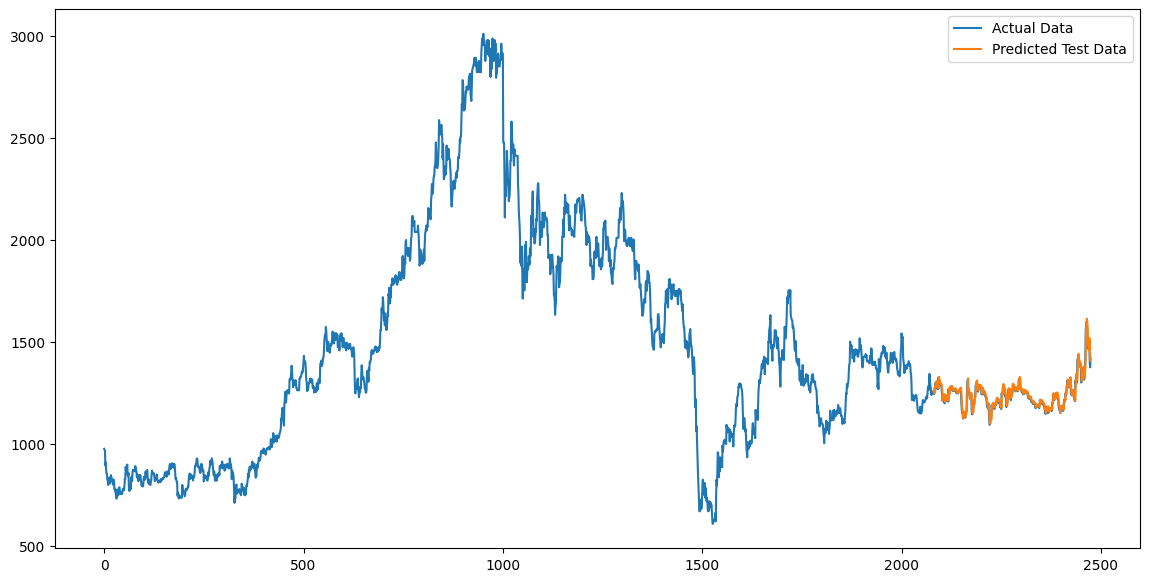

In [ ]:
# Membuat gambar (figure) dengan ukuran 14x7
plt.figure(figsize=(14, 7))
# Membuat plot garis untuk data aktual dengan label 'Actual Data'
plt.plot(bbtn_hist3, label='Actual Data')
# Membuat plot garis untuk data prediksi pada dengan label 'Predicted Test Data'
plt.plot(testPredictPlot_bbtn_gru, label='Predicted Test Data')
# Menambahkan legenda ke plot berdasarkan label-label yang telah ditentukan sebelumnya
plt.legend()
# Menampilkan plot
plt.show()

In [ ]:
# Fungsi menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Melihat Metric Evaluation RMSE dan MAPE
mape_gru_l5_bbtn = mean_absolute_percentage_error(Y_test_bbtn_gru,test_predict_bbtn_gru)
print("RMSE of gru:", np.sqrt(mean_squared_error(Y_test_bbtn_gru,test_predict_bbtn_gru)))
print("MAPE of gru:", mape_gru_l5_bbtn)

RMSE of gru: 22.95529564917089
MAPE of gru: 1.2772993758368423


### Hyperparameter Tuning & Optimatization Model 6 Layers

In [ ]:
# Mengambil kolom close
bbtn_hist2 = bbtn_hist['Close']

In [ ]:
# Train-Test Split
train_size = int(len(bbtn_hist2) * 0.80)
test_size = len(bbtn_hist2) - train_size
train_data_bbtn_gru, test_data_bbtn_gru = bbtn_hist2[:train_size], bbtn_hist2[train_size:]

# Scalling data
scaler = MinMaxScaler()
bbtn_hist2 = scaler.fit_transform(np.array(bbtn_hist2).reshape(-1,1))
train_data_bbtn_gru = scaler.fit_transform(np.array(train_data_bbtn_gru).reshape(-1, 1))
test_data_bbtn_gru = scaler.transform(np.array(test_data_bbtn_gru).reshape(-1, 1))

In [ ]:
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
                   a = dataset[i:(i+time_step),0]
                   dataX.append(a)
                   dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [ ]:
# Memanggil fungsi create_dataset untuk membagi data menjadi dataset input dan output dataset dengan times step 100
time_step = 100
X_train_bbtn_gru,Y_train_bbtn_gru =  create_dataset(train_data_bbtn_gru,time_step)
X_test_bbtn_gru,Y_test_bbtn_gru =  create_dataset(test_data_bbtn_gru,time_step)

In [ ]:
Y_train_bbtn_gru

array([0.09608287, 0.09300894, 0.08993499, ..., 0.33169535, 0.3334145 ,
       0.32825709])

In [ ]:
# Memeriksa value
print(X_train_bbtn_gru.shape)
print(X_train_bbtn_gru)
print(X_test_bbtn_gru.shape)
print(Y_test_bbtn_gru.shape)

(1879, 100)
[[0.15295062 0.15141374 0.14833976 ... 0.07610231 0.07917619 0.09147198]
 [0.15141374 0.14833976 0.11913736 ... 0.07917619 0.09147198 0.09608287]
 [0.14833976 0.11913736 0.12528524 ... 0.09147198 0.09608287 0.09300894]
 ...
 [0.35121748 0.33764378 0.33934053 ... 0.34888668 0.34544842 0.34372927]
 [0.33764378 0.33934053 0.35121748 ... 0.34544842 0.34372927 0.33169535]
 [0.33934053 0.35121748 0.35461084 ... 0.34372927 0.33169535 0.3334145 ]]
(394, 100)
(394, 1)


In [ ]:
pip install keras-tuner

In [ ]:
import tensorflow as tf
from kerastuner import HyperModel, RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

# Tetapkan seed untuk inisialisasi acak
seed_value = 42
tf.random.set_seed(seed_value)
np.random.seed(seed_value)

# Definisikan fungsi untuk membuat model GRU dengan hyperparameter
def build_model_l6(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_1', min_value=50, max_value=200, step=50),
        return_sequences=True,
        input_shape=(X_train_bbtn_gru.shape[1], 1)
    ))
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_2', min_value=50, max_value=200, step=50),
        return_sequences=True
    ))
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_3', min_value=50, max_value=200, step=50),
        return_sequences=True
    ))
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_4', min_value=50, max_value=200, step=50),
        return_sequences=True
    ))
    model.add(tf.keras.layers.GRU(
        units=hp.Int('units_5', min_value=50, max_value=200, step=50)
    ))
    model.add(tf.keras.layers.Dense(1))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
        ),
        loss='mean_squared_error'
    )
    return model

In [ ]:
from kerastuner.tuners import RandomSearch

# Atur pencarian hyperparameter menggunakan RandomSearch
tuner = RandomSearch(
    build_model_l6,
    objective='val_loss',
    max_trials=10,  # Jumlah percobaan untuk menemukan kombinasi hyperparameter terbaik
    executions_per_trial=1,  # Jumlah eksekusi per percobaan untuk akurasi lebih baik
    directory='hyperparameter_tuning_l6_btn',
    project_name='gru_tuning_l6_btn'
)

# Tentukan data pelatihan dan validasi
tuner.search(X_train_bbtn_gru, Y_train_bbtn_gru, validation_data=(X_test_bbtn_gru, Y_test_bbtn_gru), epochs=30, batch_size=64, verbose=1)

# Mendapatkan hasil terbaik
best_hps_l6 = tuner.get_best_hyperparameters(num_trials=1)[0]

# Membangun model dengan hyperparameter terbaik
model_bbtn_gru_l6 = build_model_l6(best_hps_l6)

Trial 10 Complete [00h 16m 18s]
val_loss: 0.0012825364246964455

Best val_loss So Far: 9.095741552300751e-05
Total elapsed time: 02h 18m 25s


In [ ]:
print(best_hps_l6)

In [ ]:
# Melihat rangkuman model
model_bbtn_gru_l6.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_5 (GRU)                 (None, 100, 50)           7950      
                                                                 
 gru_6 (GRU)                 (None, 100, 100)          45600     
                                                                 
 gru_7 (GRU)                 (None, 100, 100)          60600     
                                                                 
 gru_8 (GRU)                 (None, 100, 100)          60600     
                                                                 
 gru_9 (GRU)                 (None, 50)                22800     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 197601 (771.88 KB)
Trainable params: 197

In [ ]:
# Menetapkan seed untuk TensorFlow untuk memastikan hasil yang konsisten dari operasi stokastik (jika ada)
tf.random.set_seed(seed_value)

# Melatih model menggunakan data pelatihan (X_train_bbtn dan Y_train_bbtn) dengan data validasi (X_test_bbtn dan Y_test_bbtn)
# Epochs adalah jumlah kali seluruh dataset akan diberikan kepada model selama proses pelatihan
# Batch_size adalah jumlah sampel data yang akan diproses sebelum pembaharuan bobot model
# verbose = 1 menghasilkan output detail pada setiap epoch selama pelatihan
model_bbtn_gru_l6.fit(X_train_bbtn_gru, Y_train_bbtn_gru, validation_data=(X_test_bbtn_gru, Y_test_bbtn_gru), epochs=50, batch_size=64, verbose=1)
model_bbtn_gru_l6.save("model_bbtn_gru_l6.h5")

Epoch 1/50
30/30 [==============================] - 51s 1s/step - loss: 0.1233 - val_loss: 0.0107
Epoch 2/50
30/30 [==============================] - 20s 657ms/step - loss: 0.0021 - val_loss: 3.9783e-04
Epoch 3/50
30/30 [==============================] - 19s 618ms/step - loss: 6.3909e-04 - val_loss: 2.6212e-04
Epoch 4/50
30/30 [==============================] - 18s 599ms/step - loss: 4.9295e-04 - val_loss: 3.5411e-04
Epoch 5/50
30/30 [==============================] - 18s 616ms/step - loss: 4.7706e-04 - val_loss: 2.1892e-04
Epoch 6/50
30/30 [==============================] - 21s 694ms/step - loss: 4.0313e-04 - val_loss: 1.5514e-04
Epoch 7/50
30/30 [==============================] - 19s 640ms/step - loss: 3.9747e-04 - val_loss: 4.1227e-04
Epoch 8/50
30/30 [==============================] - 19s 620ms/step - loss: 3.5761e-04 - val_loss: 1.3936e-04
Epoch 9/50
30/30 [==============================] - 19s 630ms/step - loss: 3.7672e-04 - val_loss: 2.1488e-04
Epoch 10/50
30/30 [===============

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Memprediksi data menggunakan model yang telah dilatih
train_predict_bbtn_gru = model_bbtn_gru_l6.predict(X_train_bbtn_gru)
test_predict_bbtn_gru = model_bbtn_gru_l6.predict(X_test_bbtn_gru)

13/13 [==============================] - 1s 72ms/step


In [ ]:
Y_train_bbtn_gru[:5]

array([0.09608287, 0.09300894, 0.08993499, 0.09147198, 0.10684162])

In [ ]:
train_predict_bbtn_gru[:5]

array([[0.08345842],
       [0.08734843],
       [0.08496802],
       [0.083386  ],
       [0.08570579]], dtype=float32)

In [ ]:
# Transformasi data ke bentuk awal
Y_train_bbtn_gru = scaler.inverse_transform(Y_train_bbtn_gru.reshape(-1, 1))
Y_test_bbtn_gru = scaler.inverse_transform(Y_test_bbtn_gru.reshape(-1, 1))
train_predict_bbtn_gru = scaler.inverse_transform(train_predict_bbtn_gru)
test_predict_bbtn_gru = scaler.inverse_transform(test_predict_bbtn_gru)

In [ ]:
Y_test_bbtn_gru[:5]

array([[1247.94470215],
       [1247.94470215],
       [1243.8125    ],
       [1276.8704834 ],
       [1276.8704834 ]])

In [ ]:
test_predict_bbtn_gru[:5]

array([[1235.8036],
       [1229.7003],
       [1229.4628],
       [1225.2666],
       [1258.4877]], dtype=float32)

In [ ]:
# Mendefinisikan jumlah langkah waktu sebelumnya yang akan digunakan sebagai input untuk memprediksi langkah waktu saat ini
look_back = 100

# Membuat array kosong dengan ukuran yang sama dengan bbtn_hist2
trainPredictPlot_bbtn = np.empty_like(bbtn_hist2)
# Mengisi array dengan nilai yang sama dengan NaN (untuk plot)
trainPredictPlot_bbtn[:,:] = np.nan
# Mengisi bagian dari array dengan hasil prediksi pada data pelatihan
# Menempatkan hasil prediksi pada posisi yang sesuai dalam array untuk plotting
trainPredictPlot_bbtn[look_back : len(train_predict_bbtn_gru)+look_back,:] = train_predict_bbtn_gru

# Membuat array kosong dengan ukuran yang sama dengan bbtn_hist2
testPredictPlot_bbtn_gru = np.empty_like(bbtn_hist2)
# Mengisi array dengan nilai yang sama dengan NaN (untuk plot)
testPredictPlot_bbtn_gru[:,:] = np.nan
# Mengisi bagian dari array dengan hasil prediksi pada data uji
# Menempatkan hasil prediksi pada posisi yang sesuai dalam array untuk plotting
testPredictPlot_bbtn_gru[len(train_predict_bbtn_gru) + (look_back) * 2 + 1 : len(bbtn_hist2) - 1, :] = test_predict_bbtn_gru

In [ ]:
# Mengambil data harga saham close dan dijadikan dalam bentuk array numpy
bbtn_hist3=bbtn_hist['Close'].to_numpy()

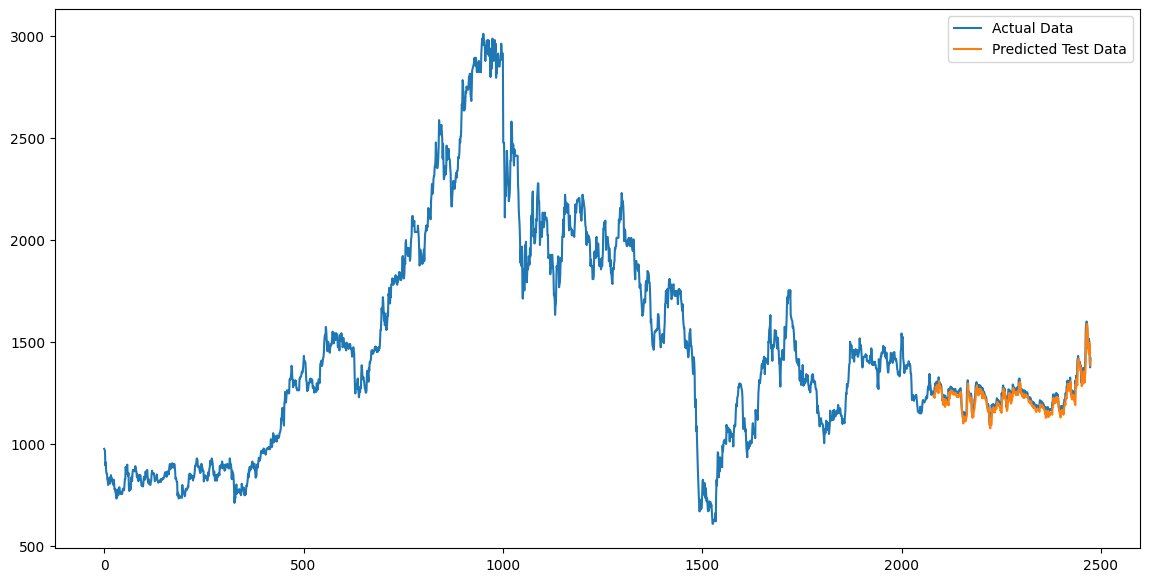

In [ ]:
# Membuat gambar (figure) dengan ukuran 14x7
plt.figure(figsize=(14, 7))
# Membuat plot garis untuk data aktual dengan label 'Actual Data'
plt.plot(bbtn_hist3, label='Actual Data')
# Membuat plot garis untuk data prediksi pada dengan label 'Predicted Test Data'
plt.plot(testPredictPlot_bbtn_gru, label='Predicted Test Data')
# Menambahkan legenda ke plot berdasarkan label-label yang telah ditentukan sebelumnya
plt.legend()
# Menampilkan plot
plt.show()

In [ ]:
# Fungsi menghitung MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
# Melihat Metric Evaluation RMSE dan MAPE
mape_gru_l6_bbtn = mean_absolute_percentage_error(Y_test_bbtn_gru,test_predict_bbtn_gru)
print("RMSE of gru:", np.sqrt(mean_squared_error(Y_test_bbtn_gru,test_predict_bbtn_gru)))
print("MAPE of gru:", mape_gru_l6_bbtn)

RMSE of gru: 29.63487165109726
MAPE of gru: 1.792448431344826


In [ ]:
model_path = '/content/model_bbri_gru_l3.h5'

# Load the model
model = tf.keras.models.load_model(model_path)

In [ ]:
model.predict()

## Kesimpulan

- Layer 4:
 - RMSE of gru: 25.306044284879604
 - MAPE of gru: 1.3664863287607905
- Layer 5:
 - RMSE of gru: 22.95529564917089
 - MAPE of gru: 1.2772993758368423
- Layer 6:
 - RMSE of gru: 29.63487165109726
 - MAPE of gru: 1.792448431344826
